In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import os, math, json
import matplotlib.ticker as plticker
from datetime import datetime, timedelta
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
from pathlib import Path
from os import path
from collections import Counter, OrderedDict

pd.set_option('display.max_columns', None)


In [55]:
def initialize_style_parameters(small = False):
  
    if small == False:
        font = {
                'family' : 'DejaVu Sans',
                'weight' : 'normal',
                'size'   : 22
                }
    else:
        font = {
                'family' : 'DejaVu Sans',
                'weight' : 'normal',
                'size'   : 15
                }

    plt.rc('font', **font)

In [56]:
    
def save_pdf_img(plt, img_name):
    plt.savefig(img_name, format="pdf", bbox_inches="tight")

In [57]:
def cdf(arrays, labels, title, xlabel, scale = "linear", linewidth = 5, markevery=50, ms = 12, markers = ["s", "X", "o", "<", ">", "s"], linestyles = ['-', '-', '-', '-', '-', '-'], colors = ["blue", "red", "green", "yellow", "purple", "black"], filename = None):
    
#    markers = ["s", "X", "o", "<", ">", "s"]
    initialize_style_parameters()
    
    ys = []
    for array in arrays:
        array.sort()
        array = np.array(array)
        ys.append(np.arange(1,  len(array) + 1) / len(array))
        
    fig, ax = plt.subplots(figsize=(15,6))

    if len(arrays) == 1:
        markers = [""]
        
    for index in range(len(arrays)):
        plt.plot(arrays[index], ys[index], linestyle=linestyles[index], color = colors[index], ms = ms, markevery=markevery, label=labels[index], linewidth=linewidth)

        
        
    plt.xlabel(xlabel)
    plt.ylabel('Cumulative distribution function')
    plt.title(title)
    plt.xscale(scale)
    ax.legend(facecolor='white', framealpha=1, frameon = True)
    plt.grid(linestyle='dotted',linewidth=1.5)
    plt.tight_layout()

    
    if filename is not None:
        save_pdf_img(plt, filename)

    plt.show()


In [58]:
def boxplot(data, xlabel, ylabel, width = 0.3, style = "whitegrid", x = None, y = None, hue = None, colors = None, small = False, img_name = None):
    
    fig, ax = plt.subplots(figsize=(15,6))
    sns.set_style(style)

    if colors is not None:
        sns.set_palette(sns.color_palette(colors))

    sns.boxplot(ax = ax, data = data, width = width, x = x, y = y, hue = hue).set(
        xlabel = xlabel, 
        ylabel = ylabel,
        yscale = "log"
    )

    if img_name is not None:
        save_pdf_img(plt, img_name)

    plt.show()

In [59]:
def get_time_from_string(string):
    if string == "0":
        return string
    
    return datetime.strptime(string, "%Y-%m-%d %H:%M:%S")

In [60]:
SAME_IDS = {
    640276226174198 : 100063943387369,
    55720892273 : 100063749642928,
    60827297032 : 100064855325995,
    168548323194973 : 100046908532543,
    1485712574817701 : 100035989726002,
    65878196434 : 100064590497869,
    52198579996 : 100063492523516,
    789151797836840 : 100028371956589,
    131224233563083 : 100063678885661,
    659369120891419 : 100063592207475,
    95222938161 : 100064062786653,
    234432139909777 : 100063919928843,
    36843714108 : 100063679805358,
    9157028961 : 100057601341548,
    232983246855075 : 100064918590762,
    100064496152443 : 12852567813,
    100064030119809 : 45134780748,
    100044186811435 : 130373190333432,
    1444086445825928 : 100063672215142, 
    127858697279932 : 100057423821383, 
    186019737491 : 100063455023051, 
    326614387531342 : 100064877793082, 
    194810627240021 : 100041946134704, 
    106299223280 : 100064132091107, 
    264579842455 : 100064510431435, 
    126645915705 : 100063740912629, 
    1482919571982141 : 100063644346120, 
    190514546927 : 100039993646327, 
    235572923205127 : 100063788341911, 
    182032255155419 : 100063907994037, 
    641205306387499 : 100063997511196, 
    89686424098 : 100064538690396, 
    61034688825 : 100063473353878, 
    1016162538426204 : 100063020119347, 
    111721462217828 : 100063706410720, 
    1598987363462371 : 100064347353214, 
    124212710933420 : 100063279014636, 
    126648970682757 : 100063506865417, 
    91414372270 : 100063622207869, 
    116515020980 : 100064076793996, 
    193860950803103 : 100063632406936, 
    330541376994682 : 100063600881561, 
    350154138430441 : 100064442419190, 
    57639415551 : 100064770608339, 
    86959124863 : 100063638767030, 
    1624162894502220 : 100063477582839, 
    1503642806397092 : 100057302424716, 
    210081569389429 : 100063717229121, 
    107124643386 : 100064516221191, 
    218610566124 : 100064543220421, 
    411606772641925 : 100044595482136, 
    1752036375065578 : 100063518469973, 
    185465169674 : 100063713894281, 
    223008867858902 : 100066720822264, 
    66836833178 : 100064368416473, 
    492688614217155 : 100063572274207, 
    275233099269880 : 100046503617568, 
    689009434542083 : 100063487572614, 
    51466264699 : 100063600938867, 
    515300158666649 : 100064003541143, 
    197420200381606 : 100063848345043, 
    29859744109 : 100050492169613, 
    268914272540 : 100064372856805, 
    100231856733917 : 100063718681583, 
    124936267597609 : 100064533468934, 
    475539722825471 : 100064014821115, 
    30883294835 : 100063668253934, 
    145671418799872 : 100063481576580, 
    698737660204385 : 100063588189598, 
    52422955559 : 100063657218936, 
    165428676052 : 100063697266152, 
    1589141431105084 : 100064073976193, 
    431099560800970 : 100065344605692, 
    55803739618 : 100028098983631, 
    120713712889 : 100039446996476, 
    1640918766144198 : 100063610959077, 
    373087836097009 : 100063700866969, 
    125074560851285 : 100063640116432, 
    1632382660361751 : 100063126675836, 
    209971182373021 : 100063564403710, 
    11896148618 : 100064085853702, 
    93588366121 : 100063709084317, 
    1074065046021686 : 100063479050242, 
    636822769764619 : 100063789676171, 
    12692955711 : 100064454933136, 
    129384483834899 : 100063738542886, 
    1541703729424346 : 100067623458505, 
    39290428773 : 100063848866001, 
    211251835599632 : 100063469000141, 
    27589478990 : 100048109194190, 
    159910080741104 : 100064514569257, 
    53733502501 : 100063613301403, 
    484468248293843 : 100063708754005, 
    984519041721234 : 100062858298204, 
    46240777509 : 100063611078154, 
    100434040001314 : 100064129833608, 
    33438555325 : 100063546909540, 
    1561188134104114 : 100064068308271, 
    107520682028 : 100064918712805, 
    119208793851 : 100064700949440, 
    132114160679 : 100037609850396, 
    192831317540534 : 100063477100810, 
    196611277067 : 100063545951579, 
    230537773698519 : 100027407781772, 
    138345506195109 : 100064228864553, 
    17468834551 : 100063549491087, 
    1416021875381628 : 100063463395842, 
    27704079981 : 100063506023464, 
    1206446206062896 : 100063504313385, 
    522359791285231 : 100063501626745, 
    1574038392866184 : 100063701535282, 
    111941237005726 : 100064347301392, 
    181613422554 : 100054190366188, 
    169908223021026 : 100039986903883, 
    79727106537 : 100063449538677, 
    93486533659 : 100046589480147, 
    115484205144083 : 100058709845859, 
    1578377872427974 : 100063605499358, 
    694914637529668 : 100063602096967, 
    222092971257181 : 100063486525779, 
    119304154785788 : 100046907719488, 
    235651699018 : 100050194162285, 
    50300066114 : 100042411585367, 
    14552775246 : 100063561522068, 
    1463521957088069 : 100063959076878, 
    134236123262436 : 100054864315692, 
    144317282271701 : 100064321376970, 
    70460485257 : 100030724732237, 
    7010901522 : 100051104987815, 
    10670194020 : 100063769261298, 
    13044672572 : 100063694867453, 
    16317479654 : 100064670082175, 
    23503994928 : 100064104362406, 
    25126781485 : 100044327983083, 
    26780559615 : 100063511542336, 
    29057838653 : 100063581229840, 
    34323373682 : 100026546637012, 
    35277543605 : 100064810897911, 
    37483169645 : 100063518142872, 
    42145905998 : 100049758918771, 
    42435708153 : 100039202455170, 
    43719172161 : 100063578710208, 
    46255719950 : 100063517722911, 
    50236802693 : 100064795328166, 
    51956333241 : 100063718281556, 
    51964875663 : 100063674645866, 
    52628718341 : 100063453200803, 
    53286386626 : 100063670925599, 
    53387223944 : 100063624487995, 
    54498658347 : 100063825069768, 
    55259434598 : 100063564161714, 
    56766540637 : 100063569379449, 
    57078112039 : 100063633207023, 
    63708186167 : 100063651077257, 
    66058180994 : 100057092036080, 
    69372083633 : 100064000687480, 
    74268994896 : 100064182991342, 
    80835703246 : 100063830821507, 
    88854700101 : 100063497982844, 
    90240021027 : 100044612221390, 
    91686597689 : 100064649205295, 
    96623207231 : 100067974257191, 
    101360505199 : 100063673118095, 
    106734648882 : 100047322955198, 
    109608914695 : 100063470983346, 
    117794143230 : 100051593575949, 
    121845353350 : 100028283906707, 
    129934284324 : 100066303948228, 
    138749499281 : 100063453618366, 
    143549621770 : 100063618880945, 
    156185069843 : 100064395475439, 
    164328011384 : 100063624878436, 
    167187400091 : 100063819732988, 
    175041539271 : 100058286478783, 
    181537145183 : 100063723963563, 
    205974043008 : 100063806902490, 
    225525523760 : 100064759985932, 
    269380027923 : 100036392125507, 
    272032527181 : 100063617798446, 
    321177193184 : 100063685163045, 
    360625609389 : 100063788685871, 
    363995121699 : 100063543044556, 
    364499957032 : 100033535312076, 
    101212656596379 : 100052320085156, 
    102033473236661 : 100053669985047, 
    102065489836927 : 100037288485902, 
    108241099200760 : 100063608078421, 
    111506915551297 : 100069029200683, 
    111685042195072 : 100063466723384, 
    114964645210034 : 100063773576322, 
    115612028451605 : 100064008129559, 
    117956358229288 : 100063744932600, 
    126839740721538 : 100063279679914, 
    128427283889132 : 100063638287584, 
    128983110479859 : 100037915282950, 
    146422995398181 : 100064605613096, 
    153894744648752 : 100050274054108, 
    157642644307764 : 100022342189092, 
    160001227392214 : 100063475543158, 
    160861490640786 : 100042599545611, 
    162373073824096 : 100036393314733, 
    170675323016189 : 100063618967638, 
    178050768898367 : 100033535312938, 
    187282321295589 : 100035320285200, 
    189018551116073 : 100056650066363, 
    194138373964362 : 100031959297078, 
    201862949851456 : 100057650511296, 
    251346909086516 : 100063508573270, 
    279112458802918 : 100031660664024, 
    317788055280399 : 100067607622904, 
    369527829841639 : 100068941893001, 
    384157168264552 : 100063632259331, 
    385222638172939 : 100064304461062, 
    438817366164271 : 100058820924848, 
    448356545672307 : 100067404604315, 
    494938473965277 : 100064003536826, 
    508887815910815 : 100064789446400, 
    621126804659654 : 100064347475612, 
    677282352375996 : 100063566619883, 
    757447587750871 : 100049219101653, 
    1715171825420952 : 100064576190727, 
    1822312647810316 : 100063773842070, 
    2123621147662486 : 100063572653425, 
    324358441773854 : 100060721613657, 
    273687019743399 : 100065218591514,
    100064496152443: 12852567813,
    100044186811435: 130373190333432,
    100064030119809: 45134780748
}


INACTIVE_OCT_2020 = [8514553365, 449077442133345, 320967305169085, 179595372125918, 218834139983, 788353877895901, 26222487010, 213568475689594]


In [61]:
MBFC_NG_PAGES_PATH = 'page_list/imc_pages_updated_info.csv'  #FROM PREVIOUS PAPER - MBFC & NG Pages that are U.S. based (according to MBFC & NG)                 
MBFC_NG_PAGES_METADATA_PATH = 'page_list/imc_page_metadata.csv' #FROM CROWDTANGLE 
US_PAGES_PATH = "page_list/us_pages_merged_transparency_data_final.csv"
US_PAGES_DETECTED_DATES_PATH = "page_list/all_pages_detected_dates.csv"
MAPPING_PROFILE_OWNER_PAGE_ID = "page_list/profile_owner_map_pageid.csv"


In [62]:
NEWS_CATEGORIES = ['Media/news company','News & media website','News personality','Broadcasting & media production company',
                   'Newspaper','Media','Social Media Agency']


In [63]:
pd.read_csv("page_list/us_pages_merged_transparency_data_final.csv")

/tmp/ipykernel_2766968/1599406649.py:1: DtypeWarning: Columns (21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv("page_list/us_pages_merged_transparency_data_final.csv")


,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,page_id,page_name,firstPostDate,lastPostDate,firstWeekFollowers,currentFollowers,page_category,totalPosts,totalInteractions,avgWeeklyInteractions,meanWeeklyInteractions,activeWeeks,activeOct2020,activeJun2022,mainLanguage,currentTopAdminCountry,pctLinkPost,pctPhotoStatusPost,pctVideoPosts,topSharedDomains,mostSharedDomain,nbSharedDomains,avgPostsPerAcitveWeek,avgPostsPerWeek,page_verified,page_created_month,topAdminCountries,languageCodes,pageCategories,accountNames,nb_posts,topAdminCountry,languageCode,pageCategory,nbTopAdminCountries,nbLanguageCodes,nbPageCategories,nbAccountNames,adLib_NameChanged,adLib_AdminCountries,adLib_Organization,adLib_Address,adLib_TopAdminCountry,adLib_OrgCountry,adLib_nbAdmins,adLib_nbAdminCountries,is_dedicated,actual_pageid,page_id_2,profile_owner,first_detected_date,detected_2020,detected_2022,niche,history_file,first_detected_date_2020,first_detected_date_2022,number_of_times_detected_2020,number_of_times_detected_2022
0,0,0,0,0,0,159903787387343,South Whitehall Patch,2017-06-19,2022-06-20,0.0,1076.0,NEWS_SITE,2327,669.0,10.292308,8.0,65,False,True,en,US,95.659648,4.125483,0.214869,patch.com,patch.com,1,35.800000,8.915709,0,2010-12,['US'],['en'],['NEWS_SITE'],['South Whitehall Patch'],25,US,en,NEWS_SITE,1,1,1,1,0.0,United States (3),NaN,NaN,US,NaN,3.0,1.0,False,NaN,-1,-1,2022-06-02,False,True,True,../data/pages_posts_history_minhkha/1599037873...,2015-01-01,2022-06-02,0,17
1,1,1,1,1,1,136558953025181,Life & Culture by Tampa Bay Times,2017-06-19,2022-06-20,0.0,27209.0,NEWS_SITE,5704,55427.0,340.042945,307.0,163,False,True,en,US,98.98317,0.806452,0.210379,tampabay.com,tampabay.com,1,34.993865,21.854406,0,2010-06,['US'],['en'],['NEWS_SITE'],['Life & Culture by Tampa Bay Times'],23,US,en,NEWS_SITE,1,1,1,1,3.0,United States (7),NaN,NaN,US,NaN,7.0,1.0,True,1.365590e+14,-1,100064169466475,2022-06-02,False,True,True,../data/pages_posts_history_minhkha/1000641694...,2015-01-01,2022-06-02,0,17
2,2,2,2,2,2,869834083131145,Conservative Writers,2017-06-26,2022-06-20,0.0,958.0,MEDIA_NEWS_COMPANY,3406,108187.0,416.103846,47.0,260,True,True,en,US,78.038755,18.46741,3.493834,carolinajournal.com | blackcommunitynews.com |...,carolinajournal.com,48,13.100000,13.100000,0,2015-10,['US'],['en'],['MEDIA_NEWS_COMPANY'],['Conservative Writers'],22,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,0.0,United States (7),Conservative Writers,"Brevard County, Florida, United States",US,US,7.0,1.0,False,NaN,-1,-1,2020-10-06,True,True,True,../data/pages_posts_history_minhkha/8698340831...,2020-10-06,2022-06-20,18,2
3,3,3,3,3,3,274928162876363,"Goldsboro, NC Local - News Break",2017-06-19,2022-06-20,0.0,3536.0,MEDIA_NEWS_COMPANY,7142,4035.0,23.735294,10.0,170,True,True,en,US,100.0,0.0,0.0,newsbreak.com | newsbreakapp.com,newsbreak.com,2,42.011765,27.363985,0,2016-07,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Goldsboro, NC Local - News Break']",73,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (7), China (4)","Particle Media, Inc.",NaN,US,NaN,11.0,2.0,False,NaN,-1,-1,2020-10-14,True,True,True,../data/pages_posts_history_minhkha/2749281628...,2020-10-14,2022-06-02,15,24
4,4,4,4,4,4,350210358815966,"Lawrenceville, GA Local - News Break",2018-03-12,2022-06-20,0.0,1037.0,MEDIA_NEWS_COMPANY,7024,1287.0,7.895706,2.0,163,True,True,en,US,100.0,0.0,0.0,newsbreak.com,newsbreak.com,1,43.092025,31.497758,0,2018-03,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Lawrenceville, GA Local - News Break']",37,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (8), China (4)","Particle Media, Inc.",NaN,US,NaN,12.0,2.0,False,NaN,-1,-1,2020-10-17,True,True,True,../data/pages_posts_history_minhkha/3502103588...,2020-10-17,2022-06-02,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26853,

# 1. Loading the list of detected pages

### Load U.S. based pages with news category

In [64]:
US_PAGES = pd.read_csv(US_PAGES_PATH,index_col=None)
US_PAGES

/tmp/ipykernel_2766968/2069470906.py:1: DtypeWarning: Columns (21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  US_PAGES = pd.read_csv(US_PAGES_PATH,index_col=None)


,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,page_id,page_name,firstPostDate,lastPostDate,firstWeekFollowers,currentFollowers,page_category,totalPosts,totalInteractions,avgWeeklyInteractions,meanWeeklyInteractions,activeWeeks,activeOct2020,activeJun2022,mainLanguage,currentTopAdminCountry,pctLinkPost,pctPhotoStatusPost,pctVideoPosts,topSharedDomains,mostSharedDomain,nbSharedDomains,avgPostsPerAcitveWeek,avgPostsPerWeek,page_verified,page_created_month,topAdminCountries,languageCodes,pageCategories,accountNames,nb_posts,topAdminCountry,languageCode,pageCategory,nbTopAdminCountries,nbLanguageCodes,nbPageCategories,nbAccountNames,adLib_NameChanged,adLib_AdminCountries,adLib_Organization,adLib_Address,adLib_TopAdminCountry,adLib_OrgCountry,adLib_nbAdmins,adLib_nbAdminCountries,is_dedicated,actual_pageid,page_id_2,profile_owner,first_detected_date,detected_2020,detected_2022,niche,history_file,first_detected_date_2020,first_detected_date_2022,number_of_times_detected_2020,number_of_times_detected_2022
0,0,0,0,0,0,159903787387343,South Whitehall Patch,2017-06-19,2022-06-20,0.0,1076.0,NEWS_SITE,2327,669.0,10.292308,8.0,65,False,True,en,US,95.659648,4.125483,0.214869,patch.com,patch.com,1,35.800000,8.915709,0,2010-12,['US'],['en'],['NEWS_SITE'],['South Whitehall Patch'],25,US,en,NEWS_SITE,1,1,1,1,0.0,United States (3),NaN,NaN,US,NaN,3.0,1.0,False,NaN,-1,-1,2022-06-02,False,True,True,../data/pages_posts_history_minhkha/1599037873...,2015-01-01,2022-06-02,0,17
1,1,1,1,1,1,136558953025181,Life & Culture by Tampa Bay Times,2017-06-19,2022-06-20,0.0,27209.0,NEWS_SITE,5704,55427.0,340.042945,307.0,163,False,True,en,US,98.98317,0.806452,0.210379,tampabay.com,tampabay.com,1,34.993865,21.854406,0,2010-06,['US'],['en'],['NEWS_SITE'],['Life & Culture by Tampa Bay Times'],23,US,en,NEWS_SITE,1,1,1,1,3.0,United States (7),NaN,NaN,US,NaN,7.0,1.0,True,1.365590e+14,-1,100064169466475,2022-06-02,False,True,True,../data/pages_posts_history_minhkha/1000641694...,2015-01-01,2022-06-02,0,17
2,2,2,2,2,2,869834083131145,Conservative Writers,2017-06-26,2022-06-20,0.0,958.0,MEDIA_NEWS_COMPANY,3406,108187.0,416.103846,47.0,260,True,True,en,US,78.038755,18.46741,3.493834,carolinajournal.com | blackcommunitynews.com |...,carolinajournal.com,48,13.100000,13.100000,0,2015-10,['US'],['en'],['MEDIA_NEWS_COMPANY'],['Conservative Writers'],22,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,0.0,United States (7),Conservative Writers,"Brevard County, Florida, United States",US,US,7.0,1.0,False,NaN,-1,-1,2020-10-06,True,True,True,../data/pages_posts_history_minhkha/8698340831...,2020-10-06,2022-06-20,18,2
3,3,3,3,3,3,274928162876363,"Goldsboro, NC Local - News Break",2017-06-19,2022-06-20,0.0,3536.0,MEDIA_NEWS_COMPANY,7142,4035.0,23.735294,10.0,170,True,True,en,US,100.0,0.0,0.0,newsbreak.com | newsbreakapp.com,newsbreak.com,2,42.011765,27.363985,0,2016-07,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Goldsboro, NC Local - News Break']",73,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (7), China (4)","Particle Media, Inc.",NaN,US,NaN,11.0,2.0,False,NaN,-1,-1,2020-10-14,True,True,True,../data/pages_posts_history_minhkha/2749281628...,2020-10-14,2022-06-02,15,24
4,4,4,4,4,4,350210358815966,"Lawrenceville, GA Local - News Break",2018-03-12,2022-06-20,0.0,1037.0,MEDIA_NEWS_COMPANY,7024,1287.0,7.895706,2.0,163,True,True,en,US,100.0,0.0,0.0,newsbreak.com,newsbreak.com,1,43.092025,31.497758,0,2018-03,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Lawrenceville, GA Local - News Break']",37,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (8), China (4)","Particle Media, Inc.",NaN,US,NaN,12.0,2.0,False,NaN,-1,-1,2020-10-17,True,True,True,../data/pages_posts_history_minhkha/3502103588...,2020-10-17,2022-06-02,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26853,

In [65]:
set(US_PAGES["topAdminCountry"].to_list())

{'AU',
 'CA',
 'CR',
 'DO',
 'FR',
 'GB',
 'IL',
 'IT',
 'JP',
 'NG',
 'PK',
 'PR',
 'PT',
 'SG',
 'TR',
 'US'}

In [66]:
a = US_PAGES[["topAdminCountry","adLib_TopAdminCountry", "adLib_OrgCountry", "page_id"]]
a

,topAdminCountry,adLib_TopAdminCountry,adLib_OrgCountry,page_id
0,US,US,NaN,159903787387343
1,US,US,NaN,136558953025181
2,US,US,US,869834083131145
3,US,US,NaN,274928162876363
4,US,US,NaN,350210358815966
...,...,...,...,...
26853,US,US,NaN,2213601852293035
26854,US,US,NaN,161033123954615
26855,US,US,NaN,233592986730431
26856,US,US,US,148139691868120


In [67]:
a[a["topAdminCountry"]!="US"]

,topAdminCountry,adLib_TopAdminCountry,adLib_OrgCountry,page_id
460,SG,US,US,702890716478738
2248,DO,US,NaN,110676174616280
2506,AU,US,US,154054607978576
2632,CA,US,NaN,172154269471635
3070,CA,US,NaN,936699126457536
3095,GB,US,United Kingdom,609582352454281
3398,CR,US,NaN,224851820859017
3413,CA,US,NaN,1354199591324993
3728,PR,US,NaN,170495736982620
4155,GB,US,NaN,103701748069552


### Map page_ids that are the same (USING SAME_IDS_TABLE)

In [68]:
US_PAGES["page_id_2"] = -1

for idx, row in US_PAGES.iterrows():

    for key, value in SAME_IDS.items():
        
        if key == row["page_id"] or value == ["page_id_2"]:
            
            US_PAGES.at[idx, 'page_id'] = key
            US_PAGES.at[idx, 'page_id_2'] = value
        
US_PAGES

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,page_id,page_name,firstPostDate,lastPostDate,firstWeekFollowers,currentFollowers,page_category,totalPosts,totalInteractions,avgWeeklyInteractions,meanWeeklyInteractions,activeWeeks,activeOct2020,activeJun2022,mainLanguage,currentTopAdminCountry,pctLinkPost,pctPhotoStatusPost,pctVideoPosts,topSharedDomains,mostSharedDomain,nbSharedDomains,avgPostsPerAcitveWeek,avgPostsPerWeek,page_verified,page_created_month,topAdminCountries,languageCodes,pageCategories,accountNames,nb_posts,topAdminCountry,languageCode,pageCategory,nbTopAdminCountries,nbLanguageCodes,nbPageCategories,nbAccountNames,adLib_NameChanged,adLib_AdminCountries,adLib_Organization,adLib_Address,adLib_TopAdminCountry,adLib_OrgCountry,adLib_nbAdmins,adLib_nbAdminCountries,is_dedicated,actual_pageid,page_id_2,profile_owner,first_detected_date,detected_2020,detected_2022,niche,history_file,first_detected_date_2020,first_detected_date_2022,number_of_times_detected_2020,number_of_times_detected_2022
0,0,0,0,0,0,159903787387343,South Whitehall Patch,2017-06-19,2022-06-20,0.0,1076.0,NEWS_SITE,2327,669.0,10.292308,8.0,65,False,True,en,US,95.659648,4.125483,0.214869,patch.com,patch.com,1,35.800000,8.915709,0,2010-12,['US'],['en'],['NEWS_SITE'],['South Whitehall Patch'],25,US,en,NEWS_SITE,1,1,1,1,0.0,United States (3),NaN,NaN,US,NaN,3.0,1.0,False,NaN,-1,-1,2022-06-02,False,True,True,../data/pages_posts_history_minhkha/1599037873...,2015-01-01,2022-06-02,0,17
1,1,1,1,1,1,136558953025181,Life & Culture by Tampa Bay Times,2017-06-19,2022-06-20,0.0,27209.0,NEWS_SITE,5704,55427.0,340.042945,307.0,163,False,True,en,US,98.98317,0.806452,0.210379,tampabay.com,tampabay.com,1,34.993865,21.854406,0,2010-06,['US'],['en'],['NEWS_SITE'],['Life & Culture by Tampa Bay Times'],23,US,en,NEWS_SITE,1,1,1,1,3.0,United States (7),NaN,NaN,US,NaN,7.0,1.0,True,1.365590e+14,-1,100064169466475,2022-06-02,False,True,True,../data/pages_posts_history_minhkha/1000641694...,2015-01-01,2022-06-02,0,17
2,2,2,2,2,2,869834083131145,Conservative Writers,2017-06-26,2022-06-20,0.0,958.0,MEDIA_NEWS_COMPANY,3406,108187.0,416.103846,47.0,260,True,True,en,US,78.038755,18.46741,3.493834,carolinajournal.com | blackcommunitynews.com |...,carolinajournal.com,48,13.100000,13.100000,0,2015-10,['US'],['en'],['MEDIA_NEWS_COMPANY'],['Conservative Writers'],22,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,0.0,United States (7),Conservative Writers,"Brevard County, Florida, United States",US,US,7.0,1.0,False,NaN,-1,-1,2020-10-06,True,True,True,../data/pages_posts_history_minhkha/8698340831...,2020-10-06,2022-06-20,18,2
3,3,3,3,3,3,274928162876363,"Goldsboro, NC Local - News Break",2017-06-19,2022-06-20,0.0,3536.0,MEDIA_NEWS_COMPANY,7142,4035.0,23.735294,10.0,170,True,True,en,US,100.0,0.0,0.0,newsbreak.com | newsbreakapp.com,newsbreak.com,2,42.011765,27.363985,0,2016-07,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Goldsboro, NC Local - News Break']",73,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (7), China (4)","Particle Media, Inc.",NaN,US,NaN,11.0,2.0,False,NaN,-1,-1,2020-10-14,True,True,True,../data/pages_posts_history_minhkha/2749281628...,2020-10-14,2022-06-02,15,24
4,4,4,4,4,4,350210358815966,"Lawrenceville, GA Local - News Break",2018-03-12,2022-06-20,0.0,1037.0,MEDIA_NEWS_COMPANY,7024,1287.0,7.895706,2.0,163,True,True,en,US,100.0,0.0,0.0,newsbreak.com,newsbreak.com,1,43.092025,31.497758,0,2018-03,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Lawrenceville, GA Local - News Break']",37,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (8), China (4)","Particle Media, Inc.",NaN,US,NaN,12.0,2.0,False,NaN,-1,-1,2020-10-17,True,True,True,../data/pages_posts_history_minhkha/3502103588...,2020-10-17,2022-06-02,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26853,

### Remove duplicates between page_id and page_id_2

In [69]:
all_ids = US_PAGES["page_id"].to_list() + US_PAGES["page_id_2"].to_list()
duplicates = [key for key, value in Counter(all_ids).items() if value >= 2 and key != -1]
US_PAGES = US_PAGES[~US_PAGES["page_id"].isin(duplicates)]

print("Number of duplicates", len(duplicates))
US_PAGES


Number of duplicates 0


,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,page_id,page_name,firstPostDate,lastPostDate,firstWeekFollowers,currentFollowers,page_category,totalPosts,totalInteractions,avgWeeklyInteractions,meanWeeklyInteractions,activeWeeks,activeOct2020,activeJun2022,mainLanguage,currentTopAdminCountry,pctLinkPost,pctPhotoStatusPost,pctVideoPosts,topSharedDomains,mostSharedDomain,nbSharedDomains,avgPostsPerAcitveWeek,avgPostsPerWeek,page_verified,page_created_month,topAdminCountries,languageCodes,pageCategories,accountNames,nb_posts,topAdminCountry,languageCode,pageCategory,nbTopAdminCountries,nbLanguageCodes,nbPageCategories,nbAccountNames,adLib_NameChanged,adLib_AdminCountries,adLib_Organization,adLib_Address,adLib_TopAdminCountry,adLib_OrgCountry,adLib_nbAdmins,adLib_nbAdminCountries,is_dedicated,actual_pageid,page_id_2,profile_owner,first_detected_date,detected_2020,detected_2022,niche,history_file,first_detected_date_2020,first_detected_date_2022,number_of_times_detected_2020,number_of_times_detected_2022
0,0,0,0,0,0,159903787387343,South Whitehall Patch,2017-06-19,2022-06-20,0.0,1076.0,NEWS_SITE,2327,669.0,10.292308,8.0,65,False,True,en,US,95.659648,4.125483,0.214869,patch.com,patch.com,1,35.800000,8.915709,0,2010-12,['US'],['en'],['NEWS_SITE'],['South Whitehall Patch'],25,US,en,NEWS_SITE,1,1,1,1,0.0,United States (3),NaN,NaN,US,NaN,3.0,1.0,False,NaN,-1,-1,2022-06-02,False,True,True,../data/pages_posts_history_minhkha/1599037873...,2015-01-01,2022-06-02,0,17
1,1,1,1,1,1,136558953025181,Life & Culture by Tampa Bay Times,2017-06-19,2022-06-20,0.0,27209.0,NEWS_SITE,5704,55427.0,340.042945,307.0,163,False,True,en,US,98.98317,0.806452,0.210379,tampabay.com,tampabay.com,1,34.993865,21.854406,0,2010-06,['US'],['en'],['NEWS_SITE'],['Life & Culture by Tampa Bay Times'],23,US,en,NEWS_SITE,1,1,1,1,3.0,United States (7),NaN,NaN,US,NaN,7.0,1.0,True,1.365590e+14,-1,100064169466475,2022-06-02,False,True,True,../data/pages_posts_history_minhkha/1000641694...,2015-01-01,2022-06-02,0,17
2,2,2,2,2,2,869834083131145,Conservative Writers,2017-06-26,2022-06-20,0.0,958.0,MEDIA_NEWS_COMPANY,3406,108187.0,416.103846,47.0,260,True,True,en,US,78.038755,18.46741,3.493834,carolinajournal.com | blackcommunitynews.com |...,carolinajournal.com,48,13.100000,13.100000,0,2015-10,['US'],['en'],['MEDIA_NEWS_COMPANY'],['Conservative Writers'],22,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,0.0,United States (7),Conservative Writers,"Brevard County, Florida, United States",US,US,7.0,1.0,False,NaN,-1,-1,2020-10-06,True,True,True,../data/pages_posts_history_minhkha/8698340831...,2020-10-06,2022-06-20,18,2
3,3,3,3,3,3,274928162876363,"Goldsboro, NC Local - News Break",2017-06-19,2022-06-20,0.0,3536.0,MEDIA_NEWS_COMPANY,7142,4035.0,23.735294,10.0,170,True,True,en,US,100.0,0.0,0.0,newsbreak.com | newsbreakapp.com,newsbreak.com,2,42.011765,27.363985,0,2016-07,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Goldsboro, NC Local - News Break']",73,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (7), China (4)","Particle Media, Inc.",NaN,US,NaN,11.0,2.0,False,NaN,-1,-1,2020-10-14,True,True,True,../data/pages_posts_history_minhkha/2749281628...,2020-10-14,2022-06-02,15,24
4,4,4,4,4,4,350210358815966,"Lawrenceville, GA Local - News Break",2018-03-12,2022-06-20,0.0,1037.0,MEDIA_NEWS_COMPANY,7024,1287.0,7.895706,2.0,163,True,True,en,US,100.0,0.0,0.0,newsbreak.com,newsbreak.com,1,43.092025,31.497758,0,2018-03,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Lawrenceville, GA Local - News Break']",37,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (8), China (4)","Particle Media, Inc.",NaN,US,NaN,12.0,2.0,False,NaN,-1,-1,2020-10-17,True,True,True,../data/pages_posts_history_minhkha/3502103588...,2020-10-17,2022-06-02,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26853,

### Map page_id and owner_id -- Some rows put the owner_id as the page_id. We need page_id to match our db

In [70]:
US_PAGES["profile_owner"] = -1
map_dataframe = pd.read_csv("page_list/profile_owner_map_pageid.csv")


for idx, row in US_PAGES.iterrows():

    matching = map_dataframe[(map_dataframe["profile_owner"] == row["page_id"]) | (map_dataframe["page_id"] == row["page_id"])]
    
    if matching.shape[0] == 1: 
    
        US_PAGES.at[idx, 'profile_owner'] = matching["profile_owner"].to_list()[0]
        US_PAGES.at[idx, 'page_id'] = matching["page_id"].to_list()[0]
    
    matching = map_dataframe[(map_dataframe["profile_owner"] == row["page_id_2"]) | (map_dataframe["page_id"] == row["page_id_2"])]

    if matching.shape[0] == 1: 
    
        US_PAGES.at[idx, 'profile_owner'] = matching["profile_owner"].to_list()[0]
        US_PAGES.at[idx, 'page_id_2'] = matching["page_id"].to_list()[0]
    
US_PAGES

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,page_id,page_name,firstPostDate,lastPostDate,firstWeekFollowers,currentFollowers,page_category,totalPosts,totalInteractions,avgWeeklyInteractions,meanWeeklyInteractions,activeWeeks,activeOct2020,activeJun2022,mainLanguage,currentTopAdminCountry,pctLinkPost,pctPhotoStatusPost,pctVideoPosts,topSharedDomains,mostSharedDomain,nbSharedDomains,avgPostsPerAcitveWeek,avgPostsPerWeek,page_verified,page_created_month,topAdminCountries,languageCodes,pageCategories,accountNames,nb_posts,topAdminCountry,languageCode,pageCategory,nbTopAdminCountries,nbLanguageCodes,nbPageCategories,nbAccountNames,adLib_NameChanged,adLib_AdminCountries,adLib_Organization,adLib_Address,adLib_TopAdminCountry,adLib_OrgCountry,adLib_nbAdmins,adLib_nbAdminCountries,is_dedicated,actual_pageid,page_id_2,profile_owner,first_detected_date,detected_2020,detected_2022,niche,history_file,first_detected_date_2020,first_detected_date_2022,number_of_times_detected_2020,number_of_times_detected_2022
0,0,0,0,0,0,159903787387343,South Whitehall Patch,2017-06-19,2022-06-20,0.0,1076.0,NEWS_SITE,2327,669.0,10.292308,8.0,65,False,True,en,US,95.659648,4.125483,0.214869,patch.com,patch.com,1,35.800000,8.915709,0,2010-12,['US'],['en'],['NEWS_SITE'],['South Whitehall Patch'],25,US,en,NEWS_SITE,1,1,1,1,0.0,United States (3),NaN,NaN,US,NaN,3.0,1.0,False,NaN,-1,-1,2022-06-02,False,True,True,../data/pages_posts_history_minhkha/1599037873...,2015-01-01,2022-06-02,0,17
1,1,1,1,1,1,136558953025181,Life & Culture by Tampa Bay Times,2017-06-19,2022-06-20,0.0,27209.0,NEWS_SITE,5704,55427.0,340.042945,307.0,163,False,True,en,US,98.98317,0.806452,0.210379,tampabay.com,tampabay.com,1,34.993865,21.854406,0,2010-06,['US'],['en'],['NEWS_SITE'],['Life & Culture by Tampa Bay Times'],23,US,en,NEWS_SITE,1,1,1,1,3.0,United States (7),NaN,NaN,US,NaN,7.0,1.0,True,1.365590e+14,-1,100064169466475,2022-06-02,False,True,True,../data/pages_posts_history_minhkha/1000641694...,2015-01-01,2022-06-02,0,17
2,2,2,2,2,2,869834083131145,Conservative Writers,2017-06-26,2022-06-20,0.0,958.0,MEDIA_NEWS_COMPANY,3406,108187.0,416.103846,47.0,260,True,True,en,US,78.038755,18.46741,3.493834,carolinajournal.com | blackcommunitynews.com |...,carolinajournal.com,48,13.100000,13.100000,0,2015-10,['US'],['en'],['MEDIA_NEWS_COMPANY'],['Conservative Writers'],22,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,0.0,United States (7),Conservative Writers,"Brevard County, Florida, United States",US,US,7.0,1.0,False,NaN,-1,-1,2020-10-06,True,True,True,../data/pages_posts_history_minhkha/8698340831...,2020-10-06,2022-06-20,18,2
3,3,3,3,3,3,274928162876363,"Goldsboro, NC Local - News Break",2017-06-19,2022-06-20,0.0,3536.0,MEDIA_NEWS_COMPANY,7142,4035.0,23.735294,10.0,170,True,True,en,US,100.0,0.0,0.0,newsbreak.com | newsbreakapp.com,newsbreak.com,2,42.011765,27.363985,0,2016-07,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Goldsboro, NC Local - News Break']",73,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (7), China (4)","Particle Media, Inc.",NaN,US,NaN,11.0,2.0,False,NaN,-1,-1,2020-10-14,True,True,True,../data/pages_posts_history_minhkha/2749281628...,2020-10-14,2022-06-02,15,24
4,4,4,4,4,4,350210358815966,"Lawrenceville, GA Local - News Break",2018-03-12,2022-06-20,0.0,1037.0,MEDIA_NEWS_COMPANY,7024,1287.0,7.895706,2.0,163,True,True,en,US,100.0,0.0,0.0,newsbreak.com,newsbreak.com,1,43.092025,31.497758,0,2018-03,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Lawrenceville, GA Local - News Break']",37,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (8), China (4)","Particle Media, Inc.",NaN,US,NaN,12.0,2.0,False,NaN,-1,-1,2020-10-17,True,True,True,../data/pages_posts_history_minhkha/3502103588...,2020-10-17,2022-06-02,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26853,

### Dropping duplicated after adding profile owner

In [71]:
# I HAVE MANUALLY CHECKED THAT THERE IS NO DUPLICATES WHEN SEPARATELY CONSIDERING page_id_2 and profile_owner
# CANT DO IT THE SAME WAY AS page_id BECAUSE MANY -1 values
# I MANUALLY CHECKED THAT WHEN CONSIDERING page_id, page_id_2, and profile_owner alltogether, there were no duplicates

US_PAGES = US_PAGES.drop_duplicates(subset=["page_id"], keep='first')
US_PAGES

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,page_id,page_name,firstPostDate,lastPostDate,firstWeekFollowers,currentFollowers,page_category,totalPosts,totalInteractions,avgWeeklyInteractions,meanWeeklyInteractions,activeWeeks,activeOct2020,activeJun2022,mainLanguage,currentTopAdminCountry,pctLinkPost,pctPhotoStatusPost,pctVideoPosts,topSharedDomains,mostSharedDomain,nbSharedDomains,avgPostsPerAcitveWeek,avgPostsPerWeek,page_verified,page_created_month,topAdminCountries,languageCodes,pageCategories,accountNames,nb_posts,topAdminCountry,languageCode,pageCategory,nbTopAdminCountries,nbLanguageCodes,nbPageCategories,nbAccountNames,adLib_NameChanged,adLib_AdminCountries,adLib_Organization,adLib_Address,adLib_TopAdminCountry,adLib_OrgCountry,adLib_nbAdmins,adLib_nbAdminCountries,is_dedicated,actual_pageid,page_id_2,profile_owner,first_detected_date,detected_2020,detected_2022,niche,history_file,first_detected_date_2020,first_detected_date_2022,number_of_times_detected_2020,number_of_times_detected_2022
0,0,0,0,0,0,159903787387343,South Whitehall Patch,2017-06-19,2022-06-20,0.0,1076.0,NEWS_SITE,2327,669.0,10.292308,8.0,65,False,True,en,US,95.659648,4.125483,0.214869,patch.com,patch.com,1,35.800000,8.915709,0,2010-12,['US'],['en'],['NEWS_SITE'],['South Whitehall Patch'],25,US,en,NEWS_SITE,1,1,1,1,0.0,United States (3),NaN,NaN,US,NaN,3.0,1.0,False,NaN,-1,-1,2022-06-02,False,True,True,../data/pages_posts_history_minhkha/1599037873...,2015-01-01,2022-06-02,0,17
1,1,1,1,1,1,136558953025181,Life & Culture by Tampa Bay Times,2017-06-19,2022-06-20,0.0,27209.0,NEWS_SITE,5704,55427.0,340.042945,307.0,163,False,True,en,US,98.98317,0.806452,0.210379,tampabay.com,tampabay.com,1,34.993865,21.854406,0,2010-06,['US'],['en'],['NEWS_SITE'],['Life & Culture by Tampa Bay Times'],23,US,en,NEWS_SITE,1,1,1,1,3.0,United States (7),NaN,NaN,US,NaN,7.0,1.0,True,1.365590e+14,-1,100064169466475,2022-06-02,False,True,True,../data/pages_posts_history_minhkha/1000641694...,2015-01-01,2022-06-02,0,17
2,2,2,2,2,2,869834083131145,Conservative Writers,2017-06-26,2022-06-20,0.0,958.0,MEDIA_NEWS_COMPANY,3406,108187.0,416.103846,47.0,260,True,True,en,US,78.038755,18.46741,3.493834,carolinajournal.com | blackcommunitynews.com |...,carolinajournal.com,48,13.100000,13.100000,0,2015-10,['US'],['en'],['MEDIA_NEWS_COMPANY'],['Conservative Writers'],22,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,0.0,United States (7),Conservative Writers,"Brevard County, Florida, United States",US,US,7.0,1.0,False,NaN,-1,-1,2020-10-06,True,True,True,../data/pages_posts_history_minhkha/8698340831...,2020-10-06,2022-06-20,18,2
3,3,3,3,3,3,274928162876363,"Goldsboro, NC Local - News Break",2017-06-19,2022-06-20,0.0,3536.0,MEDIA_NEWS_COMPANY,7142,4035.0,23.735294,10.0,170,True,True,en,US,100.0,0.0,0.0,newsbreak.com | newsbreakapp.com,newsbreak.com,2,42.011765,27.363985,0,2016-07,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Goldsboro, NC Local - News Break']",73,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (7), China (4)","Particle Media, Inc.",NaN,US,NaN,11.0,2.0,False,NaN,-1,-1,2020-10-14,True,True,True,../data/pages_posts_history_minhkha/2749281628...,2020-10-14,2022-06-02,15,24
4,4,4,4,4,4,350210358815966,"Lawrenceville, GA Local - News Break",2018-03-12,2022-06-20,0.0,1037.0,MEDIA_NEWS_COMPANY,7024,1287.0,7.895706,2.0,163,True,True,en,US,100.0,0.0,0.0,newsbreak.com,newsbreak.com,1,43.092025,31.497758,0,2018-03,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Lawrenceville, GA Local - News Break']",37,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (8), China (4)","Particle Media, Inc.",NaN,US,NaN,12.0,2.0,False,NaN,-1,-1,2020-10-17,True,True,True,../data/pages_posts_history_minhkha/3502103588...,2020-10-17,2022-06-02,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26853,

### Add detected date to US_PAGES

In [72]:
US_PAGES["detected_date"] = "2015-01-01 00:00:00"

US_PAGES_DETECTED_DATES = pd.read_csv(US_PAGES_DETECTED_DATES_PATH)[["account_platformId", "detected_date"]]
US_PAGES_DETECTED_DATES = US_PAGES_DETECTED_DATES.rename(columns={"account_platformId": "page_id"})

for idx, row in US_PAGES.iterrows():

    DETECTED_DATES_FOR_PAGE = US_PAGES_DETECTED_DATES[(US_PAGES_DETECTED_DATES["page_id"] == row["page_id"]) | (US_PAGES_DETECTED_DATES["page_id"] == row["page_id_2"])| (US_PAGES_DETECTED_DATES["page_id"] == row["profile_owner"])]
    
    if DETECTED_DATES_FOR_PAGE.shape[0] >= 1:
        
        US_PAGES.at[idx, 'detected_date'] = min(DETECTED_DATES_FOR_PAGE["detected_date"].to_list())

US_PAGES["detected_date_datetime"] = [get_time_from_string(item) for item in US_PAGES["detected_date"]]
US_PAGES["detected_date_year"] = [item.year for item in US_PAGES["detected_date_datetime"]]

US_PAGES
US_PAGES_IDS = set(US_PAGES.page_id.to_list())



### Number of pages without detected dates

In [73]:
print("Number of pages without detected date", US_PAGES[US_PAGES["detected_date_year"] == 2015].shape[0])

Number of pages without detected date 10973


### EXTRACTING PAGES DETECTED DURING OCTOBER 2020

In [74]:
US_PAGES_2020 = US_PAGES[US_PAGES["detected_date_year"]== 2020 ]
US_PAGES_2020

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,page_id,page_name,firstPostDate,lastPostDate,firstWeekFollowers,currentFollowers,page_category,totalPosts,totalInteractions,avgWeeklyInteractions,meanWeeklyInteractions,activeWeeks,activeOct2020,activeJun2022,mainLanguage,currentTopAdminCountry,pctLinkPost,pctPhotoStatusPost,pctVideoPosts,topSharedDomains,mostSharedDomain,nbSharedDomains,avgPostsPerAcitveWeek,avgPostsPerWeek,page_verified,page_created_month,topAdminCountries,languageCodes,pageCategories,accountNames,nb_posts,topAdminCountry,languageCode,pageCategory,nbTopAdminCountries,nbLanguageCodes,nbPageCategories,nbAccountNames,adLib_NameChanged,adLib_AdminCountries,adLib_Organization,adLib_Address,adLib_TopAdminCountry,adLib_OrgCountry,adLib_nbAdmins,adLib_nbAdminCountries,is_dedicated,actual_pageid,page_id_2,profile_owner,first_detected_date,detected_2020,detected_2022,niche,history_file,first_detected_date_2020,first_detected_date_2022,number_of_times_detected_2020,number_of_times_detected_2022,detected_date,detected_date_datetime,detected_date_year
3,3,3,3,3,3,274928162876363,"Goldsboro, NC Local - News Break",2017-06-19,2022-06-20,0.0,3536.0,MEDIA_NEWS_COMPANY,7142,4035.0,23.735294,10.0,170,True,True,en,US,100.0,0.0,0.0,newsbreak.com | newsbreakapp.com,newsbreak.com,2,42.011765,27.363985,0,2016-07,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Goldsboro, NC Local - News Break']",73,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (7), China (4)","Particle Media, Inc.",NaN,US,NaN,11.0,2.0,False,NaN,-1,-1,2020-10-14,True,True,True,../data/pages_posts_history_minhkha/2749281628...,2020-10-14,2022-06-02,15,24,2020-10-15 10:17:54,2020-10-15 10:17:54,2020
4,4,4,4,4,4,350210358815966,"Lawrenceville, GA Local - News Break",2018-03-12,2022-06-20,0.0,1037.0,MEDIA_NEWS_COMPANY,7024,1287.0,7.895706,2.0,163,True,True,en,US,100.0,0.0,0.0,newsbreak.com,newsbreak.com,1,43.092025,31.497758,0,2018-03,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Lawrenceville, GA Local - News Break']",37,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (8), China (4)","Particle Media, Inc.",NaN,US,NaN,12.0,2.0,False,NaN,-1,-1,2020-10-17,True,True,True,../data/pages_posts_history_minhkha/3502103588...,2020-10-17,2022-06-02,13,13,2020-10-18 10:17:58,2020-10-18 10:17:58,2020
6,6,6,6,6,6,52013060503,WisSports.net,2017-06-26,2022-06-20,0.0,31239.0,BROADCASTING_MEDIA_PRODUCTION,7866,121028.0,463.708812,260.0,261,True,True,en,US,55.237732,44.177473,0.584795,wissports.net | sportngin.com | iheart.com | s...,wissports.net,4,30.137931,30.253846,0,2008-06,['US'],['en'],['BROADCASTING_MEDIA_PRODUCTION'],['WisSports.net'],14,US,en,BROADCASTING_MEDIA_PRODUCTION,1,1,1,1,0.0,United States (8),NaN,NaN,US,NaN,8.0,1.0,True,5.201306e+10,-1,100048547815243,2020-10-01,True,True,True,../data/pages_posts_history_minhkha/1000485478...,2020-10-01,2022-06-14,5,3,2020-09-29 14:47:11,2020-09-29 14:47:11,2020
8,8,8,8,8,8,46649543331,7News - WHDH Boston,2017-06-19,2022-06-20,0.0,505337.0,MEDIA_NEWS_COMPANY,61962,24260981.0,92599.164122,86629.5,262,True,True,en,US,96.186372,2.890481,0.923146,whdh.com,whdh.com,1,236.496183,237.402299,1,2008-11,['US'],['en'],['MEDIA_NEWS_COMPANY'],['7News - WHDH Boston'],797,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,United States (11),SUNBEAM TELEVISION CORPORATION,"North Bay Village, Miami-Dade County, Florida,...",US,US,11.0,1.0,True,4.664954e+10,-1,100064380353385,2020-10-01,True,True,False,../data/pages_posts_history_minhkha/1000643803...,2020-10-01,2022-06-02,30,30,2020-09-29 13:10:39,2020-09-29 13:10:39,2020
13,13,13,13,13,13,1761994977390826,"Jonesboro, AR Local - News Break",2017-06-19,2022-06-20,0.0,2684.0,MEDIA_NEWS_COMPANY,6100,2161.0,12.786982,4.0,169,True,True,en,US,100.0,0.0,0.0,newsbreak.com | newsbreakapp.com,newsbreak.com,2,36.094675,23.371648,0,2016-08,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Jonesboro, AR Local - News Break']",21,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (8), China (4)","Particle Media, Inc.",NaN,US,

# 2. Fraction of MBFC/NG pages that we hade detected

### Load MBFS & NG pages

In [77]:
mbfc_ng_pages = pd.read_csv(MBFC_NG_PAGES_PATH,index_col=None)
mbfc_ng_pages

,page_id,page_name,partisanship,mis_info,domain,followers_count,category,country,status,profile_owner,topAdminCountry,orgCountry,pageCategory
0,128407570539436,Activist Post,Far Left,True,activistpost.com,524494.0,Business & Economy Website,NaN,Accessible,-1,US,NaN,Business & economy website
1,140738092630206,TheBlaze,Far Right,True,theblaze.com,2516108.0,Media/News Company,NaN,Accessible,-1,US,United States of America,Media/news company
2,222149727806378,Against Crony Capitalism,Slightly Right,False,ac2news.com,416160.0,Political Organization,NaN,Accessible,100064382630806,US,NaN,Political organisation
3,111705624143,24ur.com,Center,False,24ur.com,237666.0,News & Media Website,NaN,Accessible,-1,Slovenia,NaN,News & media website
4,166618413413767,Jay Sekulow,Far Right,False,aclj.org,4409624.0,Lawyer & Law Firm,United States,Accessible,100044551831302,US,United States of America,Lawyer & law firm
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,415018200464,Sunshine State News,Slightly Right,False,sunshinestatenews.com,10948.0,News & Media Website,NaN,Accessible,-1,US,NaN,News & media website
3138,104935317836712,Health Ranger คู่หู กู้สุขภาพ,Far Right,True,NaN,1179.0,Health/Beauty,NaN,Accessible,-1,Thailand,NaN,Health/beauty
3139,111956537145503,Beyond Blindfold,Center,False,NaN,44953.0,Interest,NaN,Accessible,-1,Slovenia,NaN,News & media website
3140,462181067499328,Source Politics,Slightly Left,False,NaN,50560.0,Media/News Company,NaN,Accessible,-1,US,NaN,Media/news company


### Put owner_id as page_id for pages who have it -- This is important because the matching with metadata is done through owner id 

In [78]:
nb_pages_updated = 0
for idx, row in mbfc_ng_pages.iterrows():
    if row["profile_owner"] != -1:
        mbfc_ng_pages.at[idx,'page_id'] = row["profile_owner"]
        nb_pages_updated += 1
        
print(nb_pages_updated)

862


### Keep only U.S. based MBFS & NG pages

In [79]:
mbfc_ng_pages = mbfc_ng_pages[(mbfc_ng_pages.topAdminCountry=='US') | (mbfc_ng_pages.orgCountry.str.contains('United States'))]
mbfc_ng_pages


,page_id,page_name,partisanship,mis_info,domain,followers_count,category,country,status,profile_owner,topAdminCountry,orgCountry,pageCategory
0,128407570539436,Activist Post,Far Left,True,activistpost.com,524494.0,Business & Economy Website,NaN,Accessible,-1,US,NaN,Business & economy website
1,140738092630206,TheBlaze,Far Right,True,theblaze.com,2516108.0,Media/News Company,NaN,Accessible,-1,US,United States of America,Media/news company
2,100064382630806,Against Crony Capitalism,Slightly Right,False,ac2news.com,416160.0,Political Organization,NaN,Accessible,100064382630806,US,NaN,Political organisation
4,100044551831302,Jay Sekulow,Far Right,False,aclj.org,4409624.0,Lawyer & Law Firm,United States,Accessible,100044551831302,US,United States of America,Lawyer & law firm
6,1203436729730305,Red Blue Divide,Far Right,False,redbluedivide.com,588505.0,Media/News Company,NaN,Accessible,-1,US,NaN,Media/news company
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,19420215926,CNSNews.com,Slightly Right,False,NaN,2363785.0,News & Media Website,NaN,Accessible,-1,US,United States of America,News & media website
3134,1662488247335306,American Patriot,Far Right,True,NaN,454129.0,Media/News Company,NaN,Accessible,-1,US,United States of America,Interest
3137,415018200464,Sunshine State News,Slightly Right,False,sunshinestatenews.com,10948.0,News & Media Website,NaN,Accessible,-1,US,NaN,News & media website
3140,462181067499328,Source Politics,Slightly Left,False,NaN,50560.0,Media/News Company,NaN,Accessible,-1,US,NaN,Media/news company


In [82]:
mbfc_ng_pages.groupby(['category'])['category'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)

,category,count
55,Media/News Company,472
63,Newspaper,454
61,News & Media Website,360
10,Broadcasting & Media Production Company,311
65,Nonprofit Organization,235
94,TV Channel,220
52,Magazine,87
80,Publisher,45
100,Website,32
18,Community,24


### Keep only U.S based MBFS & NG pages with news media categories


In [25]:
mbfc_ng_pages[~mbfc_ng_pages.pageCategory.isin(NEWS_CATEGORIES)].sort_values(by="followers_count", ascending=False).head(200)


,page_id,page_name,partisanship,mis_info,domain,followers_count,category,country,status,profile_owner,topAdminCountry,orgCountry,pageCategory
1725,7270241753,YouTube,Center,False,youtube.com,96634938.0,Product/Service,NaN,Accessible,-1,US,United States of America,Product/Service
1594,70630972354,Jesus Daily,Center,True,jesusdaily.com,35482624.0,Religious Organization,United States,Accessible,-1,US,NaN,Non-profit organisation
2816,179417642100354,NTD Television,Slightly Right,True,ntd.com,31195564.0,TV Network,United States,Accessible,-1,US,NaN,TV network
2015,100044561550831,NASA - National Aeronautics and Space Administ...,Center,False,nasa.gov,25168644.0,Government Organization,NaN,Accessible,100044561550831,US,United States of America,Government organization
2599,104266592953439,ESPN,Center,False,espn.com,21460861.0,TV Network,NaN,Accessible,-1,US,United States of America,TV network
...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,100053573430453,Oceana,Center,False,oceana.org,1029882.0,Nonprofit Organization,NaN,Accessible,100053573430453,US,United States of America,Nonprofit organization
114,100064494802168,azfamily 3TV CBS 5,Center,False,azfamily.com,1029556.0,TV Channel,United States,Accessible,100064494802168,US,United States of America,TV channel
1497,100079304247054,Population Research Institute,Far Right,False,pop.org,1021657.0,Nonprofit Organization,United States,Accessible,100079304247054,US,United States of America,Non-profit organisation
2481,226813135190,Texas Hill Country,Center,False,texashillcountry.com,1018066.0,Local & Travel Website,United States,Accessible,-1,US,NaN,Regional Website


In [26]:
mbfc_ng_pages = mbfc_ng_pages[mbfc_ng_pages.pageCategory.isin(NEWS_CATEGORIES)]
mbfc_ng_pages

,page_id,page_name,partisanship,mis_info,domain,followers_count,category,country,status,profile_owner,topAdminCountry,orgCountry,pageCategory
1,140738092630206,TheBlaze,Far Right,True,theblaze.com,2516108.0,Media/News Company,NaN,Accessible,-1,US,United States of America,Media/news company
6,1203436729730305,Red Blue Divide,Far Right,False,redbluedivide.com,588505.0,Media/News Company,NaN,Accessible,-1,US,NaN,Media/news company
16,100064496152443,Chron.com from the Houston Chronicle,Slightly Left,False,chron.com,512672.0,News & Media Website,NaN,Accessible,100064496152443,US,NaN,News & media website
17,1444086445825928,Daily Surge,Far Right,False,dailysurge.com,33335.0,Media/News Company,NaN,Accessible,-1,US,NaN,Media/news company
18,9432926737,Rewire.News,Far Left,False,rewire.news,113633.0,News & Media Website,NaN,Accessible,-1,US,United States of America,News & media website
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,324358441773854,The Michigan Star,Slightly Right,False,NaN,645.0,Media/News Company,NaN,Accessible,-1,US,United States of America,Media/news company
3131,19420215926,CNSNews.com,Slightly Right,False,NaN,2363785.0,News & Media Website,NaN,Accessible,-1,US,United States of America,News & media website
3137,415018200464,Sunshine State News,Slightly Right,False,sunshinestatenews.com,10948.0,News & Media Website,NaN,Accessible,-1,US,NaN,News & media website
3140,462181067499328,Source Politics,Slightly Left,False,NaN,50560.0,Media/News Company,NaN,Accessible,-1,US,NaN,Media/news company


### Get Metadata of MBFS & NG pages that we have filtered out (News and U.S. based)

In [27]:
mbfc_ng_pages_metadata = pd.read_csv(MBFC_NG_PAGES_METADATA_PATH,index_col=None)
mbfc_ng_pages = pd.merge(left=mbfc_ng_pages, right=mbfc_ng_pages_metadata, left_on="page_id", right_on="page_id")
mbfc_ng_pages


,page_id,page_name_x,partisanship,mis_info,domain,followers_count,category,country,status,profile_owner,topAdminCountry,orgCountry,pageCategory,page_name_y,pageNameChanged,firstPostDate,lastPostDate,firstWeekFollowers,currentFollowers,page_category,pageCategoryChanged,totalPosts,totalInteractions,avgWeeklyInteractions,meanWeeklyInteractions,activeWeeks,activeOct2020,activeJun2022,mainLanguage,isMultiLang,currentTopAdminCountry,topAdminCountryChanged,pctLinkPost,pctPhotoStatusPost,pctVideoPosts,topSharedDomains,mostSharedDomain,nbSharedDomains,avgPostsPerAcitveWeek,avgPostsPerWeek
0,140738092630206,TheBlaze,Far Right,True,theblaze.com,2516108.0,Media/News Company,NaN,Accessible,-1,US,United States of America,Media/news company,TheBlaze,False,2017-06-19,2022-06-20,0,2979342,MEDIA_NEWS_COMPANY,False,56102,111714032,426389.435115,332870.5,262,True,True,en,False,US,False,90.046701,1.179994,8.773306,theblaze.com|dailywire.com|louderwithcrowder.c...,theblaze.com,4,214.129771,214.950192
1,1203436729730305,Red Blue Divide,Far Right,False,redbluedivide.com,588505.0,Media/News Company,NaN,Accessible,-1,US,NaN,Media/news company,Red Blue Divide,False,2017-07-03,2019-12-30,0,588317,MEDIA_NEWS_COMPANY,False,9658,21471391,163903.748092,139841.0,131,False,False,en,False,US,False,80.151170,8.832056,11.016774,redbluedivide.com|clickfunnels.com|sosharethis...,redbluedivide.com,10,73.725191,74.292308
2,100064496152443,Chron.com from the Houston Chronicle,Slightly Left,False,chron.com,512672.0,News & Media Website,NaN,Accessible,100064496152443,US,NaN,News & media website,Chron,False,2017-07-03,2022-07-04,0,482115,NEWS_SITE,False,66796,17124214,65359.595420,61688.0,262,True,True,en,False,US,False,95.954848,1.061441,2.983712,chron.com|houstonchronicle.com,chron.com,2,254.946565,255.923372
3,1444086445825928,Daily Surge,Far Right,False,dailysurge.com,33335.0,Media/News Company,NaN,Accessible,-1,US,NaN,Media/news company,Daily Surge,False,2017-06-19,2022-06-20,0,28265,MEDIA_NEWS_COMPANY,False,9214,146292,619.881356,320.0,236,True,True,en,False,US,False,64.347732,34.490992,1.161276,foxnews.com|dailysurge.com|breitbart.com|thebl...,foxnews.com,22,39.042373,35.302682
4,9432926737,Rewire.News,Far Left,False,rewire.news,113633.0,News & Media Website,NaN,Accessible,-1,US,United States of America,News & media website,Rewirenewsgroup,False,2017-06-19,2022-06-20,0,104902,NEWS_SITE,False,9545,746404,2870.784615,2572.5,260,True,True,en,False,US,False,94.824515,3.038240,2.137245,rewire.news|rewirenewsgroup.com|facebook.com|p...,rewire.news,4,36.711538,36.570881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,324358441773854,The Michigan Star,Slightly Right,False,NaN,645.0,Media/News Company,NaN,Accessible,-1,US,United States of America,Media/news company,The Michigan Star,False,2019-07-22,2022-06-20,0,707,MEDIA_NEWS_COMPANY,False,6400,10338,73.842857,56.5,140,True,True,en,False,US,False,99.781250,0.187500,0.031250,themichiganstar.com,themichiganstar.com,1,45.714286,42.105263
1557,19420215926,CNSNews.com,Slightly Right,False,NaN,2363785.0,News & Media Website,NaN,Accessible,-1,US,United States of America,News & media website,CNSNews.com,False,2017-06-19,2022-06-20,0,2151263,NEWS_SITE,False,23455,73463104,280393.526718,207977.0,262,True,True,en,False,US,False,77.186101,4.242166,18.571733,cnsnews.com|newsbusters.org|mrctv.org|mrc.org,cnsnews.com,4,89.522901,89.865900
1558,415018200464,Sunshine State News,Slightly Right,False,sunshinestatenews.com,10948.0,News & Media Website,NaN,Accessible,-1,US,NaN,News & media website,Sunshine State News,False,2017-07-03,2019-10-28,0,10766,NEWS_SITE,False,2977,34702,301.756522,220.0,115,False,False,en,False,US,False,90.225059,9.774941,0.000000,sunshinestatenews.com,sunshinestatenews.com,1,25.886957,24.603306
1559,462181067499328,Source Politics,Slightly Left,False,NaN,50560.0,Media/News Company,NaN,Accessible,-

### Label extra inactive pages in October 2020 -- IMC file already contains that field, but upon manual inspection, I have found that some other pages should be labeled as inactive

In [28]:
nb_pages_updated = 0
for idx, row in mbfc_ng_pages.iterrows():
    if row["page_id"] in INACTIVE_OCT_2020:
        mbfc_ng_pages.at[idx,'activeOct2020'] = False
        nb_pages_updated+=1
        
print(nb_pages_updated)

8


### Filter MBFS & NG U.S. news pages to ones who have english as a main language (field from metadata)

In [29]:
mbfc_ng_pages = mbfc_ng_pages[mbfc_ng_pages.mainLanguage.isin(['-','en'])]
print(mbfc_ng_pages.shape[0], "mbfc/ng pages are US-based news/media and using English as main language")


1553 mbfc/ng pages are US-based news/media and using English as main language


In [30]:
mbfc_ng_pages.groupby("pageCategory")['pageCategory'].count()

pageCategory
Broadcasting & media production company    283
Media                                       11
Media/news company                         421
News & media website                       379
News personality                            10
Newspaper                                  448
Social Media Agency                          1
Name: pageCategory, dtype: int64

### Fraction of these MBFS & NG Pages that we have detected (only october 2020)

In [31]:
mbfc_ng_pages["detected_2020"] = False
mbfc_ng_pages["detected_overall"] = False

all_detected_pages_ids_2020 = set([item for item in US_PAGES_2020.page_id.to_list() + US_PAGES_2020.page_id_2.to_list() + US_PAGES_2020.profile_owner.to_list() if item != -1])
all_detected_pages_ids_overall = set([item for item in US_PAGES.page_id.to_list() + US_PAGES.page_id_2.to_list() + US_PAGES.profile_owner.to_list() if item != -1])


for idx, row in mbfc_ng_pages.iterrows():
    
    page_ids = [item for item in [row["page_id"], row["profile_owner"]] if item != -1]
    
    if len([item for item in page_ids if item in all_detected_pages_ids_2020]) > 0:
        mbfc_ng_pages.at[idx, "detected_2020"] = True
        
    if len([item for item in page_ids if item in all_detected_pages_ids_overall]) > 0:
        mbfc_ng_pages.at[idx, "detected_overall"] = True
        
    
    
fraction_detected = 100 * mbfc_ng_pages[mbfc_ng_pages["detected_2020"]==True].shape[0]/ mbfc_ng_pages.shape[0]
print("Number of Newsguard and mbfs news sources that we have detected", mbfc_ng_pages[mbfc_ng_pages["detected_2020"] == True].shape[0])
print("Fraction", fraction_detected)


Number of Newsguard and mbfs news sources that we have detected 1321
Fraction 85.06117192530586


/tmp/ipykernel_2766968/841244566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mbfc_ng_pages["detected_2020"] = False
/tmp/ipykernel_2766968/841244566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mbfc_ng_pages["detected_overall"] = False


### Fraction of these MBFS & NG Pages that we have detected (overall)

In [32]:
fraction_detected = 100 * mbfc_ng_pages[mbfc_ng_pages["detected_overall"]==True].shape[0]/ mbfc_ng_pages.shape[0]

print("Number of Newsguard and mbfs news sources that we have detected", mbfc_ng_pages[mbfc_ng_pages["detected_overall"] == True].shape[0])
print("Fraction", fraction_detected)


Number of Newsguard and mbfs news sources that we have detected 1474
Fraction 94.91307147456536


In [33]:
mbfc_ng_pages

,page_id,page_name_x,partisanship,mis_info,domain,followers_count,category,country,status,profile_owner,topAdminCountry,orgCountry,pageCategory,page_name_y,pageNameChanged,firstPostDate,lastPostDate,firstWeekFollowers,currentFollowers,page_category,pageCategoryChanged,totalPosts,totalInteractions,avgWeeklyInteractions,meanWeeklyInteractions,activeWeeks,activeOct2020,activeJun2022,mainLanguage,isMultiLang,currentTopAdminCountry,topAdminCountryChanged,pctLinkPost,pctPhotoStatusPost,pctVideoPosts,topSharedDomains,mostSharedDomain,nbSharedDomains,avgPostsPerAcitveWeek,avgPostsPerWeek,detected_2020,detected_overall
0,140738092630206,TheBlaze,Far Right,True,theblaze.com,2516108.0,Media/News Company,NaN,Accessible,-1,US,United States of America,Media/news company,TheBlaze,False,2017-06-19,2022-06-20,0,2979342,MEDIA_NEWS_COMPANY,False,56102,111714032,426389.435115,332870.5,262,True,True,en,False,US,False,90.046701,1.179994,8.773306,theblaze.com|dailywire.com|louderwithcrowder.c...,theblaze.com,4,214.129771,214.950192,True,True
1,1203436729730305,Red Blue Divide,Far Right,False,redbluedivide.com,588505.0,Media/News Company,NaN,Accessible,-1,US,NaN,Media/news company,Red Blue Divide,False,2017-07-03,2019-12-30,0,588317,MEDIA_NEWS_COMPANY,False,9658,21471391,163903.748092,139841.0,131,False,False,en,False,US,False,80.151170,8.832056,11.016774,redbluedivide.com|clickfunnels.com|sosharethis...,redbluedivide.com,10,73.725191,74.292308,False,False
2,100064496152443,Chron.com from the Houston Chronicle,Slightly Left,False,chron.com,512672.0,News & Media Website,NaN,Accessible,100064496152443,US,NaN,News & media website,Chron,False,2017-07-03,2022-07-04,0,482115,NEWS_SITE,False,66796,17124214,65359.595420,61688.0,262,True,True,en,False,US,False,95.954848,1.061441,2.983712,chron.com|houstonchronicle.com,chron.com,2,254.946565,255.923372,True,True
3,1444086445825928,Daily Surge,Far Right,False,dailysurge.com,33335.0,Media/News Company,NaN,Accessible,-1,US,NaN,Media/news company,Daily Surge,False,2017-06-19,2022-06-20,0,28265,MEDIA_NEWS_COMPANY,False,9214,146292,619.881356,320.0,236,True,True,en,False,US,False,64.347732,34.490992,1.161276,foxnews.com|dailysurge.com|breitbart.com|thebl...,foxnews.com,22,39.042373,35.302682,True,True
4,9432926737,Rewire.News,Far Left,False,rewire.news,113633.0,News & Media Website,NaN,Accessible,-1,US,United States of America,News & media website,Rewirenewsgroup,False,2017-06-19,2022-06-20,0,104902,NEWS_SITE,False,9545,746404,2870.784615,2572.5,260,True,True,en,False,US,False,94.824515,3.038240,2.137245,rewire.news|rewirenewsgroup.com|facebook.com|p...,rewire.news,4,36.711538,36.570881,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,324358441773854,The Michigan Star,Slightly Right,False,NaN,645.0,Media/News Company,NaN,Accessible,-1,US,United States of America,Media/news company,The Michigan Star,False,2019-07-22,2022-06-20,0,707,MEDIA_NEWS_COMPANY,False,6400,10338,73.842857,56.5,140,True,True,en,False,US,False,99.781250,0.187500,0.031250,themichiganstar.com,themichiganstar.com,1,45.714286,42.105263,True,True
1557,19420215926,CNSNews.com,Slightly Right,False,NaN,2363785.0,News & Media Website,NaN,Accessible,-1,US,United States of America,News & media website,CNSNews.com,False,2017-06-19,2022-06-20,0,2151263,NEWS_SITE,False,23455,73463104,280393.526718,207977.0,262,True,True,en,False,US,False,77.186101,4.242166,18.571733,cnsnews.com|newsbusters.org|mrctv.org|mrc.org,cnsnews.com,4,89.522901,89.865900,True,True
1558,415018200464,Sunshine State News,Slightly Right,False,sunshinestatenews.com,10948.0,News & Media Website,NaN,Accessible,-1,US,NaN,News & media website,Sunshine State News,False,2017-07-03,2019-10-28,0,10766,NEWS_SITE,False,2977,34702,301.756522,220.0,115,False,False,en,False,US,False,90.225059,9.774941,0.000000,sunshinestatenews.com,sunshinestatenews.com,1,25.886957,24

### Labelling US_PAGES as niche or listed 

In [28]:
US_PAGES["niche"] = True

listed_pages_ids = [item for item in mbfc_ng_pages.page_id.to_list() + mbfc_ng_pages.profile_owner.to_list() if item != -1]

for idx, row in US_PAGES.iterrows():
    
    page_ids = [item for item in [row["page_id"], row["page_id_2"], row["profile_owner"]] if item != -1]
    if len([item for item in page_ids if item in listed_pages_ids]) > 0:
        US_PAGES.at[idx, "niche"] = False
        
US_PAGES_2020 = US_PAGES[US_PAGES["detected_date_year"]== 2020 ]


/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Number of domains detected per day -- october 2020

In [166]:
number_of_pages_per_day = dict()

# GET NUMBER OF MBFC/NG PAGES FOR EACH DAY 
for index, row in US_PAGES_2020[US_PAGES_2020["niche"]==False].iterrows():
    date = row['detected_date_datetime'].date()
    if date not in number_of_pages_per_day:
        
        number_of_pages_per_day[date] = {
                                            "MBFC/NG pages" : 0,
                                            "other pages": 0
                                        }
    
    number_of_pages_per_day[date]["MBFC/NG pages"] += 1

# GET NUMBER OF NICHE PAGES FOR EACH DAY 
for index, row in US_PAGES_2020[US_PAGES_2020["niche"]==True].iterrows():
    date = row['detected_date_datetime'].date()
    if date not in number_of_pages_per_day:

        number_of_pages_per_day[date] = {
                                            "MBFC/NG pages" : 0,
                                            "other pages": 0
                                        }

    number_of_pages_per_day[date]["other pages"] += 1

   

    
# GET CUMULATIVE NUMBER OF PAGES -- i.e Add the number of pages in the previous day to the current day
number_of_pages_per_day = OrderedDict(sorted(number_of_pages_per_day.items()))

previous_value_mbfc_ng = 0
previous_value_other_pages = 0

for key, value in number_of_pages_per_day.items():
    number_of_pages_per_day[key]["MBFC/NG pages"] = value["MBFC/NG pages"] + previous_value_mbfc_ng
    number_of_pages_per_day[key]["other pages"] = value["other pages"] + previous_value_other_pages

    previous_value_mbfc_ng = number_of_pages_per_day[key]["MBFC/NG pages"]
    previous_value_other_pages = number_of_pages_per_day[key]["other pages"]

number_of_pages_per_day = pd.DataFrame([{"day":key, "MBFC/NG pages": value["MBFC/NG pages"], "other pages": value["other pages"]} for key,value in number_of_pages_per_day.items()])


### RENDER PLOTS
other_pages_values = number_of_pages_per_day["other pages"].to_list()
mbfc_ng_pages_values = number_of_pages_per_day["MBFC/NG pages"].to_list()

fig, ax = plt.subplots(figsize=(16,5))
ax.bar(number_of_pages_per_day['day'],other_pages_values,color='blue')
ax.bar(number_of_pages_per_day['day'],mbfc_ng_pages_values,color='green',bottom=other_pages_values)
loc = mdates.WeekdayLocator(byweekday=TH)
ax.xaxis.set_major_locator(loc)
plt.xticks(rotation = 45)
plt.legend(['Non-MBFC/NG pages','MBFC/NG pages'])
plt.show()

fig, ax = plt.subplots(figsize=(16,5))
ax.bar(number_of_pages_per_day['day'],other_pages_values,color='blue',bottom=mbfc_ng_pages_values)
ax.bar(number_of_pages_per_day['day'],mbfc_ng_pages_values,color='green')
loc = mdates.WeekdayLocator(byweekday=TH)
ax.xaxis.set_major_locator(loc)
plt.ylabel("Number of pages")
plt.xlabel("Days")
plt.legend(['Non-MBFC/NG pages','MBFC/NG pages'])
plt.show()

fig.savefig('figures/mbfc_ng_pages_found_october_2020.pdf', bbox_inches='tight')

initialize_style_parameters()

fig, ax = plt.subplots(figsize=(16,5))
ax.bar(number_of_pages_per_day['day'],mbfc_ng_pages_values,color='green')
loc = mdates.WeekdayLocator(byweekday=TH)
ax.xaxis.set_major_locator(loc)
plt.xticks(rotation = 45)
plt.legend([])
plt.grid()
plt.ylabel("Number of pages")
plt.show()

#fig.savefig('figures/mbfc_ng_pages_found_october_2020.pdf', bbox_inches='tight')

    

KeyError: 'niche'

# 3. Delta time to detect a page

### Get history file path for each pages

In [29]:
FILES_PATH = "../data/pages_posts_history_minhkha/"
US_PAGES["history_file"] = ""

for idx, row in US_PAGES.iterrows():

    ids = [item for item in [row["page_id"], row["page_id_2"], row["profile_owner"]] if item != -1]

    for id_ in ids:
        chemin = "{}{}.csv".format(FILES_PATH, id_)
        if path.exists(chemin):
            US_PAGES.at[idx,"history_file"] = chemin
            break
            
print("We dont have the history file for the following pages: ", US_PAGES[US_PAGES["history_file"]==""].page_id.to_list())
            


/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


We dont have the history file for the following pages:  [10150127332155536, 10150135730835640, 10150100675325376, 10150141743155172, 10150100712315720, 10150117046920372]


### Get active days and detect day for each page -- exporting list of pages to use in another script

In [30]:
US_PAGES[US_PAGES["history_file"] != ""].to_csv("../data/US_PAGES_TO_GET_HISTORY_FOR.csv")

### Read file of active and detected days for concerned pages -- got this file from a script in /ssd/data

In [41]:
f = open('page_list/HISTORY_DURING_DATA_COLLECTION.json')

ACTIVE_AND_DETECTED_DAYS = json.load(f)
print("number of pages without detected dates", len([page_id for page_id, values in ACTIVE_AND_DETECTED_DAYS.items() if "2015-" in values["detected_dates"]]))

#REMOVING PAGES WITHOUT DETECTED DATES
ACTIVE_AND_DETECTED_DAYS = {page_id:values for page_id, values in ACTIVE_AND_DETECTED_DAYS.items() if "2015-" not in values["detected_dates"]}

print("number of pages with detected dates", len(ACTIVE_AND_DETECTED_DAYS))


number of pages without detected dates 10967
number of pages with detected dates 15886


### Get difference between first activity day and detected day

Considering only pages detected in 2020, representing this number of pages 14041


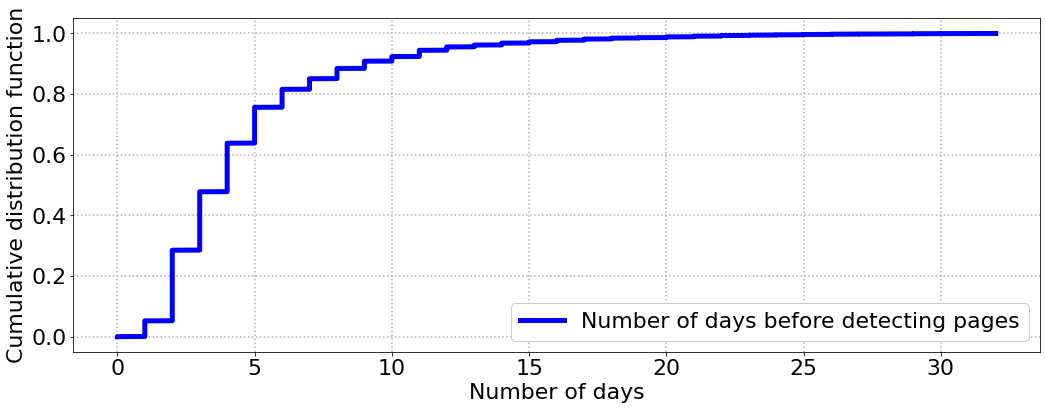

In [32]:
#FIRST we start by 2020 detected pages 

print("Considering only pages detected in 2020, representing this number of pages", len([page_id for page_id, values in ACTIVE_AND_DETECTED_DAYS.items() if "2020-" in values["detected_dates"]]))

DAYS_BEFORE_DETECTION = []

for page_id in [page_id for page_id, values in ACTIVE_AND_DETECTED_DAYS.items() if "2020-" in values["detected_dates"]]:

    day_detection_str = ACTIVE_AND_DETECTED_DAYS[page_id]["detected_dates"][:10]
    day_detection = get_time_from_string(day_detection_str + " 00:00:00")

    days_active = sorted([item[0] for item in ACTIVE_AND_DETECTED_DAYS[page_id]["posts"]])
    days_active_before_detection = sorted([item for item in days_active if item <= day_detection_str]) 
    
    DAYS_BEFORE_DETECTION.append(len(days_active_before_detection))

    

cdf([DAYS_BEFORE_DETECTION], ["Number of days before detecting pages"], "", 'Number of days', colors = ['blue','red'])




Considering all pages, representing this number of pages 15886


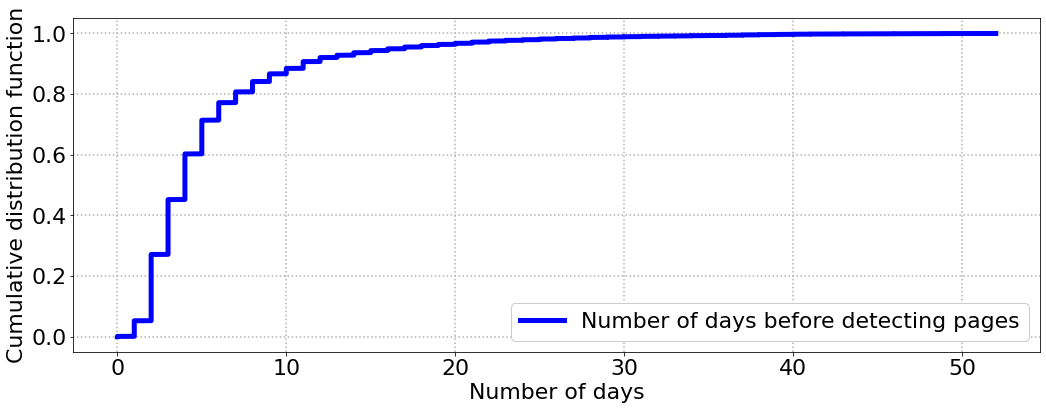

median 4.0
median 18.0


In [33]:
# all detected pages

print("Considering all pages, representing this number of pages", len(ACTIVE_AND_DETECTED_DAYS))

DAYS_BEFORE_DETECTION = []

PAGE_IDS_MORE_THAN_20_DAYS = []

for page_id in ACTIVE_AND_DETECTED_DAYS:

    day_detection_str = ACTIVE_AND_DETECTED_DAYS[page_id]["detected_dates"][:10]
    day_detection = get_time_from_string(day_detection_str + " 00:00:00")

    days_active = sorted([item[0] for item in ACTIVE_AND_DETECTED_DAYS[page_id]["posts"]])
    days_active_before_detection = sorted([item for item in days_active if item <= day_detection_str]) 
    

    DAYS_BEFORE_DETECTION.append(len(days_active_before_detection))

    if len(days_active_before_detection) >= 30:
        PAGE_IDS_MORE_THAN_20_DAYS.append(page_id)
    
cdf([DAYS_BEFORE_DETECTION], ["Number of days before detecting pages"], "", "Number of days" , colors = ['blue','red'], filename="figures/cdf_number_of_days_to_detect_pages.pdf")



print("median", np.median(DAYS_BEFORE_DETECTION))

print("median", np.percentile(DAYS_BEFORE_DETECTION, 96))
#HNA


# 4. Delta time to detect pages -- using minhkha's files 

In [78]:
US_PAGES

,page_id,page_name,firstPostDate,lastPostDate,firstWeekFollowers,currentFollowers,page_category,totalPosts,totalInteractions,avgWeeklyInteractions,meanWeeklyInteractions,activeWeeks,activeOct2020,activeJun2022,mainLanguage,currentTopAdminCountry,pctLinkPost,pctPhotoStatusPost,pctVideoPosts,topSharedDomains,mostSharedDomain,nbSharedDomains,avgPostsPerAcitveWeek,avgPostsPerWeek,page_verified,page_created_month,topAdminCountries,languageCodes,pageCategories,accountNames,nb_posts,topAdminCountry,languageCode,pageCategory,nbTopAdminCountries,nbLanguageCodes,nbPageCategories,nbAccountNames,adLib_NameChanged,adLib_AdminCountries,adLib_Organization,adLib_Address,adLib_TopAdminCountry,adLib_OrgCountry,adLib_nbAdmins,adLib_nbAdminCountries,is_dedicated,actual_pageid,page_id_2,profile_owner,detected_date,detected_date_datetime,detected_date_year
0,159903787387343,South Whitehall Patch,2017-06-19,2022-06-20,0.0,1076.0,NEWS_SITE,2327,669.0,10.292308,8.0,65,False,True,en,US,95.659648,4.125483,0.214869,patch.com,patch.com,1,35.800000,8.915709,0,2010-12,['US'],['en'],['NEWS_SITE'],['South Whitehall Patch'],25,US,en,NEWS_SITE,1,1,1,1,0.0,United States (3),NaN,NaN,US,NaN,3.0,1.0,False,NaN,-1,-1,2022-05-31 15:19:17,2022-05-31 15:19:17,2022
1,136558953025181,Life & Culture by Tampa Bay Times,2017-06-19,2022-06-20,0.0,27209.0,NEWS_SITE,5704,55427.0,340.042945,307.0,163,False,True,en,US,98.98317,0.806452,0.210379,tampabay.com,tampabay.com,1,34.993865,21.854406,0,2010-06,['US'],['en'],['NEWS_SITE'],['Life & Culture by Tampa Bay Times'],23,US,en,NEWS_SITE,1,1,1,1,3.0,United States (7),NaN,NaN,US,NaN,7.0,1.0,True,1.365590e+14,-1,100064169466475,2022-06-01 12:36:10,2022-06-01 12:36:10,2022
2,869834083131145,Conservative Writers,2017-06-26,2022-06-20,0.0,958.0,MEDIA_NEWS_COMPANY,3406,108187.0,416.103846,47.0,260,True,True,en,US,78.038755,18.46741,3.493834,carolinajournal.com | blackcommunitynews.com |...,carolinajournal.com,48,13.100000,13.100000,0,2015-10,['US'],['en'],['MEDIA_NEWS_COMPANY'],['Conservative Writers'],22,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,0.0,United States (7),Conservative Writers,"Brevard County, Florida, United States",US,US,7.0,1.0,False,NaN,-1,-1,2015-01-01 00:00:00,2015-01-01 00:00:00,2015
3,274928162876363,"Goldsboro, NC Local - News Break",2017-06-19,2022-06-20,0.0,3536.0,MEDIA_NEWS_COMPANY,7142,4035.0,23.735294,10.0,170,True,True,en,US,100.0,0.0,0.0,newsbreak.com | newsbreakapp.com,newsbreak.com,2,42.011765,27.363985,0,2016-07,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Goldsboro, NC Local - News Break']",73,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (7), China (4)","Particle Media, Inc.",NaN,US,NaN,11.0,2.0,False,NaN,-1,-1,2020-10-15 10:17:54,2020-10-15 10:17:54,2020
4,350210358815966,"Lawrenceville, GA Local - News Break",2018-03-12,2022-06-20,0.0,1037.0,MEDIA_NEWS_COMPANY,7024,1287.0,7.895706,2.0,163,True,True,en,US,100.0,0.0,0.0,newsbreak.com,newsbreak.com,1,43.092025,31.497758,0,2018-03,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Lawrenceville, GA Local - News Break']",37,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (8), China (4)","Particle Media, Inc.",NaN,US,NaN,12.0,2.0,False,NaN,-1,-1,2020-10-18 10:17:58,2020-10-18 10:17:58,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26895,2213601852293035,Houston County Herald,2019-05-06,2022-06-27,0.0,1666.0,TOPIC_NEWSPAPER,258,4707.0,33.621429,9.0,140,True,True,en,US,"(13.178294573643411,)","(69.37984496124031,)","(17.441860465116278,)",houstoncountyherald.com,houstoncountyherald.com,1,1.842857,1.573171,0,2019-01,['US'],['en'],['TOPIC_NEWSPAPER'],['Houston County Herald'],1,US,en,TOPIC_NEWSPAPER,1,1,1,1,0.0,United States (1),NaN,NaN,US,NaN,1.0,1.0,False,NaN,-1,-1,2015-01-01 00:00:00,2015-01-01 00:00:00,2015
26896,161033123954615,Lovington Leader,2017-07-03,2022-06-20,0.0,3579.0,TOPIC_NEWSPAPER,1228,15951

In [57]:
pages_2020 = list(set([int(item) for item in pd.read_csv("page_list/search_result_by_date_october2020.csv")["account_platformId"].to_list()]))
pages_2022 = list(set([int(item) for item in pd.read_csv("page_list/search_result_by_date_daily.csv")["account_platformId"].to_list()]))


In [83]:
US_PAGES["minhkha_detected_2020"] = US_PAGES.shape[0]*[False]
US_PAGES["minhkha_detected_2022"] = US_PAGES.shape[0]*[False]
    
for idx, row in US_PAGES.iterrows():
        
    page_ids = [item for item in [row["page_id"], row["profile_owner"], row["page_id_2"]] if item != -1]

    for page_id in page_ids:
        
        if page_id in pages_2020: 
             
            US_PAGES.at[idx,"minhkha_detected_2020"] = True

        if page_id in pages_2022: 
            
            US_PAGES.at[idx,"minhkha_detected_2022"] = True

            
                


/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/slide/chouakis/virtual_envs/jupyter_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [113]:
US_PAGES[(US_PAGES["minhkha_detected_2020"] == False) & (US_PAGES["minhkha_detected_2022"] == False)]

,page_id,page_name,firstPostDate,lastPostDate,firstWeekFollowers,currentFollowers,page_category,totalPosts,totalInteractions,avgWeeklyInteractions,meanWeeklyInteractions,activeWeeks,activeOct2020,activeJun2022,mainLanguage,currentTopAdminCountry,pctLinkPost,pctPhotoStatusPost,pctVideoPosts,topSharedDomains,mostSharedDomain,nbSharedDomains,avgPostsPerAcitveWeek,avgPostsPerWeek,page_verified,page_created_month,topAdminCountries,languageCodes,pageCategories,accountNames,nb_posts,topAdminCountry,languageCode,pageCategory,nbTopAdminCountries,nbLanguageCodes,nbPageCategories,nbAccountNames,adLib_NameChanged,adLib_AdminCountries,adLib_Organization,adLib_Address,adLib_TopAdminCountry,adLib_OrgCountry,adLib_nbAdmins,adLib_nbAdminCountries,is_dedicated,actual_pageid,page_id_2,profile_owner,detected_date,detected_date_datetime,detected_date_year,minhkha_detected_2020,minhkha_detected_2022
98,1861780780748141,Stone County Republican-Crane Chronicle,2017-12-25,2022-06-20,0.0,2042.0,TOPIC_NEWSPAPER,2241,17246.0,83.314010,67.0,207,True,True,en,US,70.147256,29.62963,0.223115,ccscrnews.com,ccscrnews.com,1,10.826087,9.576923,0,2017-03,['US'],['en'],['TOPIC_NEWSPAPER'],['Stone County Republican-Crane Chronicle'],4,US,en,TOPIC_NEWSPAPER,1,1,1,1,1.0,United States (4),NaN,NaN,US,NaN,4.0,1.0,False,NaN,-1,-1,2015-01-01 00:00:00,2015-01-01 00:00:00,2015,False,False
734,2036645693214469,Macaroni KID Clarksville TN,2018-02-12,2022-06-20,0.0,6466.0,MEDIA_NEWS_COMPANY,3225,162512.0,712.771930,487.5,228,True,True,en,US,17.705426,71.224806,11.069767,macaronikid.com | today.com | scarymommy.com |...,macaronikid.com,23,14.144737,14.207048,0,2018-01,['US'],['en'],['MEDIA_NEWS_COMPANY'],['Macaroni KID Clarksville TN'],3,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,United States (5),NaN,NaN,US,NaN,5.0,1.0,False,NaN,-1,-1,2022-06-08 20:21:02,2022-06-08 20:21:02,2022,False,False
1458,1843866412567413,Pint O' Comics,2017-06-19,2022-06-20,0.0,623.0,BROADCASTING_MEDIA_PRODUCTION,3041,25084.0,95.740458,62.5,262,True,True,en,US,33.541598,49.260112,17.19829,icv2.com | pintocomics.com | wesufm.org | gofu...,icv2.com,73,11.606870,11.651341,0,2017-02,['US'],['en'],['BROADCASTING_MEDIA_PRODUCTION'],"[""Pint O' Comics""]",2,US,en,BROADCASTING_MEDIA_PRODUCTION,1,1,1,1,0.0,United States (1),NaN,NaN,US,NaN,1.0,1.0,False,NaN,-1,-1,2015-01-01 00:00:00,2015-01-01 00:00:00,2015,False,False
1621,2221363638191065,Recruiter Times,2018-11-26,2022-06-20,0.0,31374.0,MEDIA_NEWS_COMPANY,5075,1004425.0,7908.858268,5368.0,127,True,True,en,US,0.788177,91.980296,7.231527,gofundme.com | tiktok.com | goarmy.com | milit...,gofundme.com,9,39.960630,27.284946,0,2018-11,['US'],['en'],['MEDIA_NEWS_COMPANY'],['Recruiter Times'],6,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,0.0,United States (10),NaN,NaN,US,NaN,10.0,1.0,False,NaN,-1,-1,2020-10-06 19:06:42,2020-10-06 19:06:42,2020,False,False
1942,2026439131008045,Michigan Business Daily,2018-06-25,2022-06-20,0.0,112.0,MEDIA_NEWS_COMPANY,12151,25.0,0.221239,0.0,113,True,True,en,US,99.99177,0.00823,0.0,mibusinessdaily.com,mibusinessdaily.com,1,107.530973,58.418269,0,2018-06,['US'],[],['MEDIA_NEWS_COMPANY'],['Michigan Business Daily'],35,US,-,MEDIA_NEWS_COMPANY,1,1,1,1,0.0,United States (6),Metric Media LLC,"Oak Park, East Moline, Rock Island County, Ill...",US,US,6.0,1.0,False,NaN,-1,-1,2020-10-19 15:35:03,2020-10-19 15:35:03,2020,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25551,1901552826782689,Freeport Herald Leader,2017-07-03,2022-06-27,0.0,1097.0,MEDIA_NEWS_COMPANY,797,10355.0,49.783654,15.0,208,True,True,en,US,"(54.32873274780427,)","(40.777917189460474,)","(4.893350062735266,)",eventbrite.com | zoom.us | liherald.com | rich...,eventbrite.com,5,3.831731,3.065385,0,2017-05,['US'],['en'],['MEDIA_NEWS_COMPANY'],['Freeport Herald Leader'],2,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,0.0,Unite

In [92]:
US_PAGES_2020 = US_PAGES[US_PAGES["minhkha_detected_2020"] == True]
US_PAGES_2022 = US_PAGES[US_PAGES["minhkha_detected_2022"] == True]

print("number of pages in 2020", US_PAGES_2020.shape[0])
print("number of pages in 2022", US_PAGES_2022.shape[0])

number of pages in 2020 24043
number of pages in 2022 19526


In [116]:
#ADD 46 to these numbers (pages without category) (4 per page, and 5 per the max pages (media_news_company, news_site))
US_PAGES_2022.groupby("pageCategory").size()


pageCategory
BROADCASTING_MEDIA_PRODUCTION    2856
MEDIA                             442
MEDIA_AGENCY                       27
MEDIA_NEWS_COMPANY               6327
MEDIA_SHOW                        126
NEWSAGENT_NEWSSTAND                 8
NEWS_PERSONALITY                 2739
NEWS_SITE                        4385
SOCIAL_MEDIA_AGENCY                38
SOCIAL_MEDIA_COMPANY                1
TOPIC_NEWSPAPER                  2577
dtype: int64

In [104]:
US_PAGES_2020.groupby("pageCategory").size()

pageCategory
BROADCASTING_MEDIA_PRODUCTION    3480
MEDIA                             614
MEDIA_AGENCY                       48
MEDIA_CRITIC                        2
MEDIA_NEWS_COMPANY               7588
MEDIA_SHOW                        168
NEWSAGENT_NEWSSTAND                12
NEWS_PERSONALITY                 3699
NEWS_SITE                        5125
SOCIAL_MEDIA_AGENCY                69
TOPIC_NEWSPAPER                  3238
dtype: int64

In [119]:
print(US_PAGES[(US_PAGES["minhkha_detected_2020"] == True) & (US_PAGES["minhkha_detected_2022"] == True)].shape[0])

US_PAGES[(US_PAGES["minhkha_detected_2020"] == True) & (US_PAGES["minhkha_detected_2022"] == True)].groupby("pageCategory").size()


16802


pageCategory
BROADCASTING_MEDIA_PRODUCTION    2561
MEDIA                             354
MEDIA_AGENCY                       19
MEDIA_NEWS_COMPANY               5346
MEDIA_SHOW                         89
NEWSAGENT_NEWSSTAND                 6
NEWS_PERSONALITY                 2265
NEWS_SITE                        3789
SOCIAL_MEDIA_AGENCY                24
TOPIC_NEWSPAPER                  2349
dtype: int64

In [137]:
oct_20 = pd.read_csv("page_list/search_result_by_date_october2020.csv")
jun_22 = pd.read_csv("page_list/search_result_by_date_daily.csv")


In [155]:
oct_20["account_platformId"] = [int(item) for item in oct_20["account_platformId"]]
jun_22["account_platformId"] = [int(item) for item in jun_22["account_platformId"]]


In [161]:
number_of_days_per_page = []
number_of_days_per_page_2022 = []

for idx, row in US_PAGES_2020.iterrows():
    
    days_for_page = oct_20[oct_20["account_platformId"].isin([item for item in [row["page_id"], row["profile_owner"]] if item != -1])] 
    
    days_for_page = [item for item in days_for_page["search_date"].to_list()]
    
    number_of_days_per_page.append(len(set(days_for_page)))
    
    
for idx, row in US_PAGES_2022.iterrows():
    
    days_for_page = jun_22[jun_22["account_platformId"].isin([item for item in [row["page_id"], row["profile_owner"]] if item != -1])] 
    
    days_for_page = [item for item in days_for_page["search_date"].to_list()]
    
    number_of_days_per_page_2022.append(len(set(days_for_page)))
    

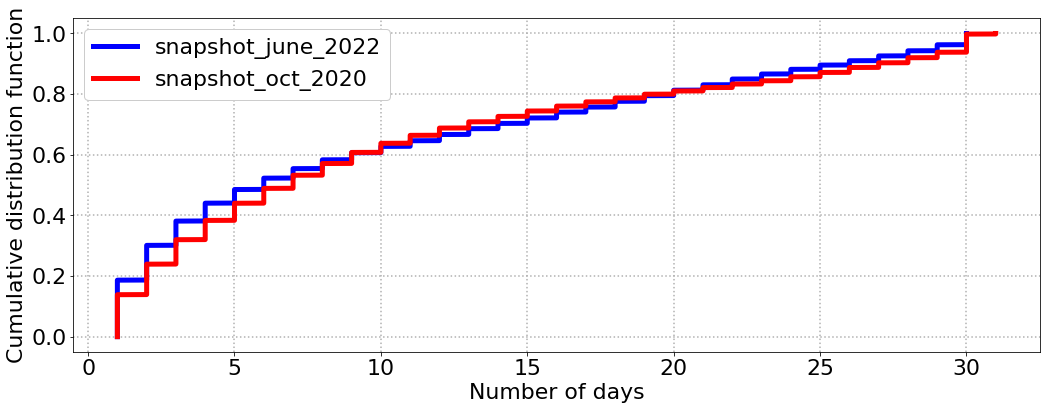

In [163]:
cdf([[item for item in number_of_days_per_page_2022 if item >0], [item for item in number_of_days_per_page if item > 0]], ["snapshot_june_2022", "snapshot_oct_2020"], "", 'Number of days', colors = ['blue','red'])



In [165]:
np.median([item for item in number_of_days_per_page if item >0])


7.0

In [159]:
US_PAGES

,page_id,page_name,firstPostDate,lastPostDate,firstWeekFollowers,currentFollowers,page_category,totalPosts,totalInteractions,avgWeeklyInteractions,meanWeeklyInteractions,activeWeeks,activeOct2020,activeJun2022,mainLanguage,currentTopAdminCountry,pctLinkPost,pctPhotoStatusPost,pctVideoPosts,topSharedDomains,mostSharedDomain,nbSharedDomains,avgPostsPerAcitveWeek,avgPostsPerWeek,page_verified,page_created_month,topAdminCountries,languageCodes,pageCategories,accountNames,nb_posts,topAdminCountry,languageCode,pageCategory,nbTopAdminCountries,nbLanguageCodes,nbPageCategories,nbAccountNames,adLib_NameChanged,adLib_AdminCountries,adLib_Organization,adLib_Address,adLib_TopAdminCountry,adLib_OrgCountry,adLib_nbAdmins,adLib_nbAdminCountries,is_dedicated,actual_pageid,page_id_2,profile_owner,detected_date,detected_date_datetime,detected_date_year,minhkha_detected_2020,minhkha_detected_2022
0,159903787387343,South Whitehall Patch,2017-06-19,2022-06-20,0.0,1076.0,NEWS_SITE,2327,669.0,10.292308,8.0,65,False,True,en,US,95.659648,4.125483,0.214869,patch.com,patch.com,1,35.800000,8.915709,0,2010-12,['US'],['en'],['NEWS_SITE'],['South Whitehall Patch'],25,US,en,NEWS_SITE,1,1,1,1,0.0,United States (3),NaN,NaN,US,NaN,3.0,1.0,False,NaN,-1,-1,2022-05-31 15:19:17,2022-05-31 15:19:17,2022,False,True
1,136558953025181,Life & Culture by Tampa Bay Times,2017-06-19,2022-06-20,0.0,27209.0,NEWS_SITE,5704,55427.0,340.042945,307.0,163,False,True,en,US,98.98317,0.806452,0.210379,tampabay.com,tampabay.com,1,34.993865,21.854406,0,2010-06,['US'],['en'],['NEWS_SITE'],['Life & Culture by Tampa Bay Times'],23,US,en,NEWS_SITE,1,1,1,1,3.0,United States (7),NaN,NaN,US,NaN,7.0,1.0,True,1.365590e+14,-1,100064169466475,2022-06-01 12:36:10,2022-06-01 12:36:10,2022,False,True
2,869834083131145,Conservative Writers,2017-06-26,2022-06-20,0.0,958.0,MEDIA_NEWS_COMPANY,3406,108187.0,416.103846,47.0,260,True,True,en,US,78.038755,18.46741,3.493834,carolinajournal.com | blackcommunitynews.com |...,carolinajournal.com,48,13.100000,13.100000,0,2015-10,['US'],['en'],['MEDIA_NEWS_COMPANY'],['Conservative Writers'],22,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,0.0,United States (7),Conservative Writers,"Brevard County, Florida, United States",US,US,7.0,1.0,False,NaN,-1,-1,2015-01-01 00:00:00,2015-01-01 00:00:00,2015,True,True
3,274928162876363,"Goldsboro, NC Local - News Break",2017-06-19,2022-06-20,0.0,3536.0,MEDIA_NEWS_COMPANY,7142,4035.0,23.735294,10.0,170,True,True,en,US,100.0,0.0,0.0,newsbreak.com | newsbreakapp.com,newsbreak.com,2,42.011765,27.363985,0,2016-07,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Goldsboro, NC Local - News Break']",73,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (7), China (4)","Particle Media, Inc.",NaN,US,NaN,11.0,2.0,False,NaN,-1,-1,2020-10-15 10:17:54,2020-10-15 10:17:54,2020,True,True
4,350210358815966,"Lawrenceville, GA Local - News Break",2018-03-12,2022-06-20,0.0,1037.0,MEDIA_NEWS_COMPANY,7024,1287.0,7.895706,2.0,163,True,True,en,US,100.0,0.0,0.0,newsbreak.com,newsbreak.com,1,43.092025,31.497758,0,2018-03,['US'],['en'],['MEDIA_NEWS_COMPANY'],"['Lawrenceville, GA Local - News Break']",37,US,en,MEDIA_NEWS_COMPANY,1,1,1,1,1.0,"United States (8), China (4)","Particle Media, Inc.",NaN,US,NaN,12.0,2.0,False,NaN,-1,-1,2020-10-18 10:17:58,2020-10-18 10:17:58,2020,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26895,2213601852293035,Houston County Herald,2019-05-06,2022-06-27,0.0,1666.0,TOPIC_NEWSPAPER,258,4707.0,33.621429,9.0,140,True,True,en,US,"(13.178294573643411,)","(69.37984496124031,)","(17.441860465116278,)",houstoncountyherald.com,houstoncountyherald.com,1,1.842857,1.573171,0,2019-01,['US'],['en'],['TOPIC_NEWSPAPER'],['Houston County Herald'],1,US,en,TOPIC_NEWSPAPER,1,1,1,1,0.0,United States (1),NaN,NaN,US,NaN,1.0,1.0,False,NaN,-1,-1,2015-01-01 00:00:00,2015-01-01 00:00:00

# 5. Investigating MBFS & NG pages that we did not detect

In [ ]:
mbfc_ng_pages_not_detected = mbfc_ng_pages[mbfc_ng_pages["detected_overall"]==False]
mbfc_ng_pages_not_detected

### Removing pages that were not active in octobre 2022

In [ ]:
## ADDING THREE PAGES THAT I MANUALLY REVIEWED AND FOUND THEY WERE IN ACTIVE
not_active = mbfc_ng_pages_not_detected[((mbfc_ng_pages_not_detected["activeOct2020"]==False) & (mbfc_ng_pages_not_detected["activeJun2022"]==False))| mbfc_ng_pages_not_detected["page_id"].isin([213568475689594, 135762769932028, 26247320522]) ]                                                          

print("Number of pages that were not active in october 2020:", not_active.shape[0], " ---- Fraction : ", 100 * (not_active.shape[0] / mbfc_ng_pages_not_detected.shape[0]), "%")

mbfc_ng_pages_not_detected = mbfc_ng_pages_not_detected[~mbfc_ng_pages_not_detected["page_id"].isin(not_active.page_id.to_list())]

not_active


In [ ]:
print("Pages that were active, and that we did not detect", mbfc_ng_pages_not_detected.shape[0])
mbfc_ng_pages_not_detected

### Investigating Categories of missed pages

In [ ]:
mbfc_ng_pages_we_detected = mbfc_ng_pages[mbfc_ng_pages["detected_overall"]==True]

not_detected_categories = mbfc_ng_pages_not_detected['page_category'].value_counts(normalize = True).reset_index()
not_detected_categories.columns = ["page_category", "MBFS/NG not covered by us"]
detected_categories = mbfc_ng_pages_we_detected['page_category'].value_counts(normalize = True).reset_index()
detected_categories.columns = ["page_category", "MBFS/NG covered by us"]

detected_and_not_detected_categories = pd.merge(detected_categories, not_detected_categories, on="page_category", how="outer").fillna(0)
detected_and_not_detected_categories.plot(x="page_category", y=["MBFS/NG covered by us", "MBFS/NG not covered by us"], kind="bar", ylabel = "Fraction of pages", figsize=(9, 8))

detected_and_not_detected_categories


### Investigating categories2 of missed pages

In [ ]:
detected_category = pd.read_csv(MBFC_NG_PAGES_PATH)
detected_category = detected_category[detected_category.page_id.isin(mbfc_ng_pages_we_detected.page_id.to_list())]
detected_category = detected_category['category'].value_counts(normalize = True).reset_index()
detected_category.columns = ["Category", "MBFS/NG covered by us"]


not_detected_category = pd.read_csv(MBFC_NG_PAGES_PATH)
not_detected_category = not_detected_category[not_detected_category.page_id.isin(mbfc_ng_pages_not_detected.page_id.to_list())]
not_detected_category = not_detected_category['category'].value_counts(normalize = True).reset_index()
not_detected_category.columns = ["Category", "MBFS/NG not covered by us"]


detected_and_not_detected_category = pd.merge(detected_category, not_detected_category, on="Category", how="outer").fillna(0)
detected_and_not_detected_category.plot(x="Category", y=["MBFS/NG covered by us", "MBFS/NG not covered by us"], kind="bar", ylabel = "Fraction of pages", figsize=(9, 8))

detected_and_not_detected_category


### Investigating reputation (followers) of missed pages

In [ ]:
detected_followers = mbfc_ng_pages_we_detected["currentFollowers"].to_list()
not_detected_followers = mbfc_ng_pages_not_detected["currentFollowers"].to_list()
not_listed_followers = US_PAGES[US_PAGES["niche"] == True]["currentFollowers"].to_list()

cdf([detected_followers,not_detected_followers, not_listed_followers], ["MBFS/NG covered",'MBFS/NG missed', "Non-MBFC/NG"], "", "Number of followers",colors= ['green','red', "blue"], scale="log", filename="figures/number_of_followers_covered_vs_not_covered.pdf" )

df_for_boxplot = [{"type":"MBFS/NG covered by us", "# Followers" : item} for item in detected_followers]
df_for_boxplot += [{"type":"MBFS/NG not covered by us", "# Followers" : item} for item in not_detected_followers]
df_for_boxplot = pd.DataFrame(df_for_boxplot)
boxplot(df_for_boxplot, "label", "label", x="type", y="# Followers")

print("Median number of followers for detected pages", np.median(detected_followers))
print("Median number of followers for non detected pages", np.median(not_detected_followers))



In [ ]:
threshold_followers = 100000
over_threshold_followers = mbfc_ng_pages[mbfc_ng_pages["followers_count"] > threshold_followers]

print("rate detected:", over_threshold_followers[over_threshold_followers["detected_overall"]==True].shape[0] / over_threshold_followers.shape[0])



### Investigating whether missed pages are misinformation

In [ ]:
detected_misinfo = mbfc_ng_pages_we_detected['mis_info'].value_counts(normalize = True).reset_index()
detected_misinfo.columns = ["Misinformation", "MBFS/NG covered by us"]


not_detected_misinfo = mbfc_ng_pages_not_detected['mis_info'].value_counts(normalize = True).reset_index()
not_detected_misinfo.columns = ["Misinformation", "MBFS/NG not covered by us"]


detected_and_not_detected_misinfo = pd.merge(detected_misinfo, not_detected_misinfo, on="Misinformation", how="outer").fillna(0)
detected_and_not_detected_misinfo.plot(x="Misinformation", y=["MBFS/NG covered by us", "MBFS/NG not covered by us"], kind="bar", ylabel = "Fraction of pages", figsize=(9, 8))

detected_and_not_detected_misinfo


### Investigating missed pages partisanships

In [ ]:
detected_partisanship = mbfc_ng_pages_we_detected['partisanship'].value_counts(normalize = True).reset_index()
detected_partisanship.columns = ["Partisanship", "MBFS/NG covered by us"]


not_detected_partisanship = mbfc_ng_pages_not_detected['partisanship'].value_counts(normalize = True).reset_index()
not_detected_partisanship.columns = ["Partisanship", "MBFS/NG not covered by us"]


detected_and_not_detected_partisanship = pd.merge(detected_partisanship, not_detected_partisanship, on="Partisanship", how="outer").fillna(0)
detected_and_not_detected_partisanship.plot(x="Partisanship", y=["MBFS/NG covered by us", "MBFS/NG not covered by us"], kind="bar", ylabel = "Fraction of pages", figsize=(9, 8))

detected_and_not_detected_partisanship


### Number of different domains shared by missed pages

In [ ]:
detected_posts_per_week = mbfc_ng_pages_we_detected["nbSharedDomains"].to_list()
not_detected_posts_per_week = mbfc_ng_pages_not_detected["nbSharedDomains"].to_list()

cdf([detected_posts_per_week,not_detected_posts_per_week], ["MBFS/NG covered by us",'MBFS/NG not covered by us'], "# Shared domains", ['blue','red'], scale="log")

df_for_boxplot = [{"type":"MBFS/NG covered by us", "# Shared domains" : item} for item in detected_posts_per_week]
df_for_boxplot += [{"type":"MBFS/NG not covered by us", "# Shared domains" : item} for item in not_detected_posts_per_week]
df_for_boxplot = pd.DataFrame(df_for_boxplot)
boxplot(df_for_boxplot, "", "# Shared domains", x="type", y="# Shared domains")




### Activity of not detected pages during October 2020

In [ ]:
mbfc_ng_pages_not_detected["active_days_october2020"] = 0
mbfc_ng_pages_not_detected["posts_per_active_day"] = 0
history_of_not_detected_pages = pd.read_csv("../data/pages_posts_history/pages_history_not_detected_pages.csv")

for idx, row in mbfc_ng_pages_not_detected.iterrows():
    
    history_for_page = history_of_not_detected_pages[history_of_not_detected_pages["Facebook Id"].isin([row["page_id"], row["profile_owner"], SAME_IDS.get(row["page_id"],-1), SAME_IDS.get(row["profile_owner"],-1)])]
    history_for_page = history_for_page[(history_for_page["Post Created Date"] >= "2020-09-28") & (history_for_page["Post Created Date"] <= "2020-11-01")]
    history_for_page = history_for_page.groupby(['Post Created Date'])['Post Created Date'].count().reset_index(name='number_of_posts')

    if len(history_for_page["number_of_posts"].to_list()) == 0:
        print(row["page_id"])
    mbfc_ng_pages_not_detected.at[idx, "active_days_october2020"] = len(history_for_page["number_of_posts"].to_list())
    mbfc_ng_pages_not_detected.at[idx, "posts_per_active_day"] = np.median(history_for_page["number_of_posts"].to_list())
    

In [ ]:
nb_days_per_page=[]
median_posts_per_active_day=[]
posts_per_active_day=[]
for page_id in mbfc_ng_pages_not_detected.page_id.to_list():
    print("Page:", page_id)
    
    
    page_timeline = history_of_not_detected_pages[history_of_not_detected_pages["Facebook Id"].isin([page_id, SAME_IDS.get(page_id, -1)])]["Post Created Date"].value_counts().sort_index()
    page_timeline.plot(x="day", y=["Number of posts"], kind="bar", ylabel = "Fraction of pages", figsize=(15, 4))
    plt.show()
    
    nb_days_per_page.append(len(page_timeline))
    median_posts_per_active_day.append(np.median([item for item in page_timeline]))
    posts_per_active_day += [item for item in page_timeline]
    

In [ ]:

print("median", np.median(mbfc_ng_pages_not_detected["active_days_october2020"].to_list()))
cdf([mbfc_ng_pages_not_detected["active_days_october2020"].to_list()], [""], "Number of active days per page", ['blue','red'])

print("median", np.median(mbfc_ng_pages_not_detected["posts_per_active_day"].to_list()))
cdf([mbfc_ng_pages_not_detected["posts_per_active_day"].to_list()], [""], "Median number of posts per active day for all pages", ['blue','red'], scale="log")




In [ ]:
cdf([median_posts_per_active_day], [""], "Median number of posts per active day for all pages", "posts", colors = ['blue','red'], scale="log")


In [ ]:
listed_pages = US_PAGES[US_PAGES["niche"]==False]

for idx, row in listed_pages.iterrows():
    history = pd.read_csv(row["history_file"])
    history = history[(history["created_date_edt"] >= "2020-09-28") & (history["created_date_edt"] <= "2020-11-01")]

    history = history.groupby(['created_date_edt'])['created_date_edt'].count().reset_index(name='number_of_posts')
    
    if len(history["number_of_posts"].to_list()) == 0:
        print(row["page_id"])
        
    
    listed_pages.at[idx, "posts_per_active_day"] = np.median(history["number_of_posts"].to_list())

#mbfc_ng_pages_not_detected["active_days_october2020"] = 0
#mbfc_ng_pages_not_detected["posts_per_active_day"] = 0
#history_of_not_detected_pages = pd.read_csv("../data/pages_posts_history/pages_history_not_detected_pages.csv")

#for idx, row in mbfc_ng_pages_not_detected.iterrows():
    
#    history_for_page = history_of_not_detected_pages[history_of_not_detected_pages["Facebook Id"].isin([row["page_id"], row["profile_owner"], SAME_IDS.get(row["page_id"],-1), SAME_IDS.get(row["profile_owner"],-1)])]
#    history_for_page = history_for_page[(history_for_page["Post Created Date"] >= "2020-09-28") & (history_for_page["Post Created Date"] <= "2020-11-01")]
#    history_for_page = history_for_page.groupby(['Post Created Date'])['Post Created Date'].count().reset_index(name='number_of_posts')

#    if len(history_for_page["number_of_posts"].to_list()) == 0:
#        print(row["page_id"])
#    mbfc_ng_pages_not_detected.at[idx, "active_days_october2020"] = len(history_for_page["number_of_posts"].to_list())
#    mbfc_ng_pages_not_detected.at[idx, "posts_per_active_day"] = np.median(history_for_page["number_of_posts"].to_list())
    



In [ ]:
listed_pages = listed_pages.dropna(subset=['posts_per_active_day'])

listed_pages_posts = listed_pages["posts_per_active_day"].to_list()

print("median", np.median(listed_pages_posts))

cdf([listed_pages_posts], [""], "Median number of posts per active day for all pages", "posts", colors=['blue','red'], scale="log")


### Analyzing non-detected-pages with more than 10 posts

In [ ]:
pages_with_more_than_ten_posts_per_day = []

for page_id in mbfc_ng_pages_not_detected.page_id.to_list():    
    
    page_timeline = history_of_not_detected_pages[history_of_not_detected_pages["Facebook Id"].isin([page_id, SAME_IDS.get(page_id, -1)])]["Post Created Date"].value_counts().sort_index()

    median_number_of_posts = np.median([item for item in page_timeline])
    
    if median_number_of_posts >= 6:
        pages_with_more_than_ten_posts_per_day.append(page_id)
    

In [ ]:
timelines = []
for page_id in pages_with_more_than_ten_posts_per_day:    
    
    page_timeline = history_of_not_detected_pages[history_of_not_detected_pages["Facebook Id"].isin([page_id, SAME_IDS.get(page_id, -1)])]
    page_timeline = page_timeline[["Page Name", "User Name", "Facebook Id", "Page Description", "Post Created Date", "URL", "Message", "Link", "Link Text", "Description"]]
    page_timeline = page_timeline.sample(n=20)
    timelines.append(page_timeline)
    


In [ ]:
for timeline in timelines:

    link = timeline["URL"].to_list()[0]
    index = link.find("/posts")
    link = link[0:index]
    
    print("Page Name: ", timeline["Page Name"].to_list()[0])
    print("Page ID: ", timeline["Facebook Id"].to_list()[0])
    print("Page Description: ", timeline["Page Description"].to_list()[0])   
    print("Link: ", link)   
    print()

    print("posts: ")
    
    for index, row in timeline.iterrows():
        print("          URL", row["URL"])    
        print("          Text: ", row["Description"])
        print("          Landing URL: ", row["Link"])
        print()
 
    print()
    print()
    print()
    print("------------------------------------------------------------------------------")
    print()
    print()
    print()

In [ ]:
timelines[0]

###  PUTING EXTRA CODE HERE

In [ ]:
stop executing here please :)

In [ ]:
print("I did not find this page on crowdtangle: https://www.facebook.com/gunsdotcom/")
print()
print("These pages no longer exist in Facebook: 307530139699465, 6160303630, 374239806353908, 100064439151112, 100063765102700, 100063540104542, 100064439151112", "374239806353908", "100063540104542", "100063765102700", "6160303630", "149131141771785", "307530139699465")
print()


In [ ]:
#CODE TO CREATE BATCH FILES
pages = []
for idx, row in mbfc_ng_pages_we_detected.iterrows():
    pages.append({
        "Page or Account URL": "https://www.facebook.com/"+str(row["page_id"]),
        "List": "Salim: MBFC & NEWSGUARD that we detected"
    })
    
pd.DataFrame(pages).to_csv("batch_files/batch_upload_mbfc_ng_pages_detected.csv", index=False)


In [ ]:
#CODE TO CREATE COPY OF FILES -- from crowdtangle files to a file named with the page id

directory_path = "../data/pages_posts_history_raw/"
directory = os.fsencode(directory_path)
    
error_files = []
all_page_ids = []


for idx, file in enumerate(os.listdir(directory)):
                            
    filename = os.fsdecode(file)

    page_ids = set([item for item in pd.read_csv(directory_path + filename,on_bad_lines='skip')["Facebook Id"].to_list() if not math.isnan(item)])
    
    if len(page_ids) != 1 and filename != "Historical-Report-El-Cazador-de-Enchufados-1970-01-01--2022-08-25.csv":
        error_files.append(filename)
        continue
        

    page_id = int(list(page_ids)[0])
    
    if filename == "Historical-Report-El-Cazador-de-Enchufados-1970-01-01--2022-08-25.csv":
        page_id = 241251883021222
    
    chemin = "../data/pages_posts_history/" + str(page_id) + ".csv"
    if not path.exists(chemin):
        print(filename, page_id)
        print(chemin)
        print()
        
    all_page_ids.append(page_id)
    
        

In [50]:
US_PAGES["totalPosts"].sum()

191182320

In [43]:
a = US_PAGES[US_PAGES["niche"]==False]

In [49]:
a[(a["currentFollowers"] < 25000) & (a["page_verified"] == 0)].shape

(261, 67)

In [53]:
set(a["niche"].to_list())

{False}

In [ ]:
print("Page not found in crowdtangle: 788353877895901. Corresponds to https://www.facebook.com/profile.php?id=100045061847877"  )

print("Not found in US pages which is correct. Should understand why its considered as US in mbfc and ng")